# Projeto: Segmentação de clientes para definição de estratégia de marketing

##Neste projeto vamos usar os algoritmos de aprendizado de máquina K-means, PCA e AutoEncoders para segmentar clientes de acordo com gastos com cartão de crédito

<img src="Clientes (4).jpg" align="left">
<img src="divisão de clientes (8).jpg" alig="right">


- Marketing é crucial para o crescimento de qualquer negócio. 
- Profissionais de marketing ajudam a construir a marca da empresa, fidelizar consumidores, aumentar o lucro e as vendas. 
- Um dos pontos chaves para esses profissionais é conhecer seus clientes e identificar suas necessidades.
- Entendendo seus consumidores, podem lançar companhas direcionadas, específicas para a necessidade de cada pessoa.
- E havendo dados sobre esses consumidores, a ciência de dados pode ser usada para segmentar esses clientes.
- Por meio da segmentação de clientes a empresa é capaz de testar diferentes ações de marketing para cada grupo de clientes com perfis semelhantes. A ideia é facilitar a atuação dos times de marketing e vendas ao longo de toda a jornada do cliente junto à empresa.




# Problema de Negócio


<img src="banco.jpg" align="center">


- No nosso caso de estudo, você foi contratado como consultor para um banco americano.
- Esse banco tem dados sobre o comportamento, gastos e hábitos de consumo de mais de 9000 clientes, registrados durante seis meses.
- O time de Marketing do banco querem lançar uma campanha com anúncios direcionandos, divindo seus clientes em pelo menos tres grupos com características distintas.
 - A base de dados usada será a Credit Card Dastasest for Clustering, disponível no site*: https://www.kaggle.com/arjunbhasin2013/ccdata



## Vamos analisar o que significa cada uma das variáveis da nossa base de dados:

- **`CUSTID`** : dentificação do titular do cartão de crédito
- **`BALANCE`** : Saldo restante na conta para fazer compras
- **`BALANCEFREQUENCY`** : com que frequência o saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência)
- **`PURCHASES`** : Valor das compras realizadas;
- **`ONEOFFPURCHASES`** : Valor máximo da compra realizada de uma só vez
- **`INSTALLMENTSPURCHASES`** : Valor da compra parcelada
- **`CASHADVANCE`** : Valor antecipado dado pelo usuário
- **`PURCHASESFREQUENCY`** : Frequência com que as compras estão sendo feitas, pontuação entre 0 e 1 (1 = frequentemente comprado, 0 = não frequentemente comprado)
- **`ONEOFFPURCHASESFREQUENCY`**: Com que frequência as compras acontecem de uma vez (1 = frequentemente comprado, 0 = não frequentemente comprado)

- **`PURCHASESINSTALLMENTSFREQUENCY`** : Frequência com que as compras a prazo estão sendo feitas (1 = frequentemente, 0 = não frequentemente)
- **`CASHADVANCEFREQUENCY`** : Frequência com que o dinheiro antecipado está sendo pago
- **`CASHADVANCETRX`** : úmero de transações feitas com “Dinheiro adiantado”
- **`PURCHASESTRX`** : Número de transações de compras feitas 
- **`CREDITLIMIT`** : Limite do cartão de crédito 
- **`PAYMENTS`** : Valor do pagamento feito pelo usuário
- **`MINIMUM_PAYMENTS`** : Valor mínimo dos pagamentos feitos pelo usuário
- **`PRCFULLPAYMENT`** : Porcentagem do pagamento total pago pelo usuário
- **`TENURE`** : Há quanto tempo o usuário tem o cartão de crédito


# Explorando os Dados

Vamos começar importando as bibliotecas do python que serão usadas, e analisando o Dataset

In [2]:
# Importando as bibliotecas que serão usadas
import pandas as pd
import numpy as np

# As bibliotecas gráficas
import seaborn as sns
import matplotlib.pyplot as plt

# E as bibliotecas de algoritmos de machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Estilo de gráfico usando nas plotagens
import matplotlib.style as style
style.use('bmh')

In [3]:
# Carregando o Dataset 'credito'

creditcard_df = pd.read_csv('credito.csv')

In [4]:
# Vamos visualizar as primeiras cinco linhas do DataFrame
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# Checando o nome e Dtype de cada coluna (Feature)
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Esse dataset é composto por 18 variáveis e 8950 entradas. Com exceção do ID do cliente, o restante das variáveis são todas numéricas.

In [6]:
# Descrição estatística das colunas numéricas (valor mínimo e máximo, desvio padrão e média)
# Serão usados principalmente para detecção de outliers que possam desbalancear os algoritmos de machine learning

creditcard_df.describe().T.iloc[:,1:]

,mean,std,min,25%,50%,75%,max
BALANCE,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [7]:
# Checando se há valores nulos nas colunas ou se existem linhas repetidas

print(f'No Dataframe há {creditcard_df.duplicated().sum()} linhas repetidas')
print(f'No Dataframe há {creditcard_df.isnull().sum().sum()} valores nulos')

No Dataframe há 0 linhas repetidas
No Dataframe há 314 valores nulos


In [8]:
# Vamos checar em quais colunas estão os valores nulos
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Checando qual a média dos valores da coluna 'MINIMUM_PAYMENTS'
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [10]:
# Preenchemos os valores nulos da coluna 'MINIMUM_PAYMENTS' com a média da coluna
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [11]:
# Vamos fazer o mesmo com o único valor ausente da coluna 'CREDIT_LIMIT'
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [12]:
# Substituímos o valor ausente pela média dos valores da coluna
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [13]:
# Checando se ainda há algum valor nulo
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
# Antes de plotarmos alguns gráficos, vamos retirar a coluna 'CUST_ID' que é apenas o ID único de cada cliente
# E a coluna 'TENURE' que indica há quanto tempo o cliente tem o cartão de crédito

creditcard_df.drop(['CUST_ID', 'TENURE'], axis = 1, inplace = True)

# Visualização dos dados

## Plotaremos alguns gráficos para tirarmos alguns insights do nosso Dataframe

In [15]:
# Quais são as colunas do nosso dataframe
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')

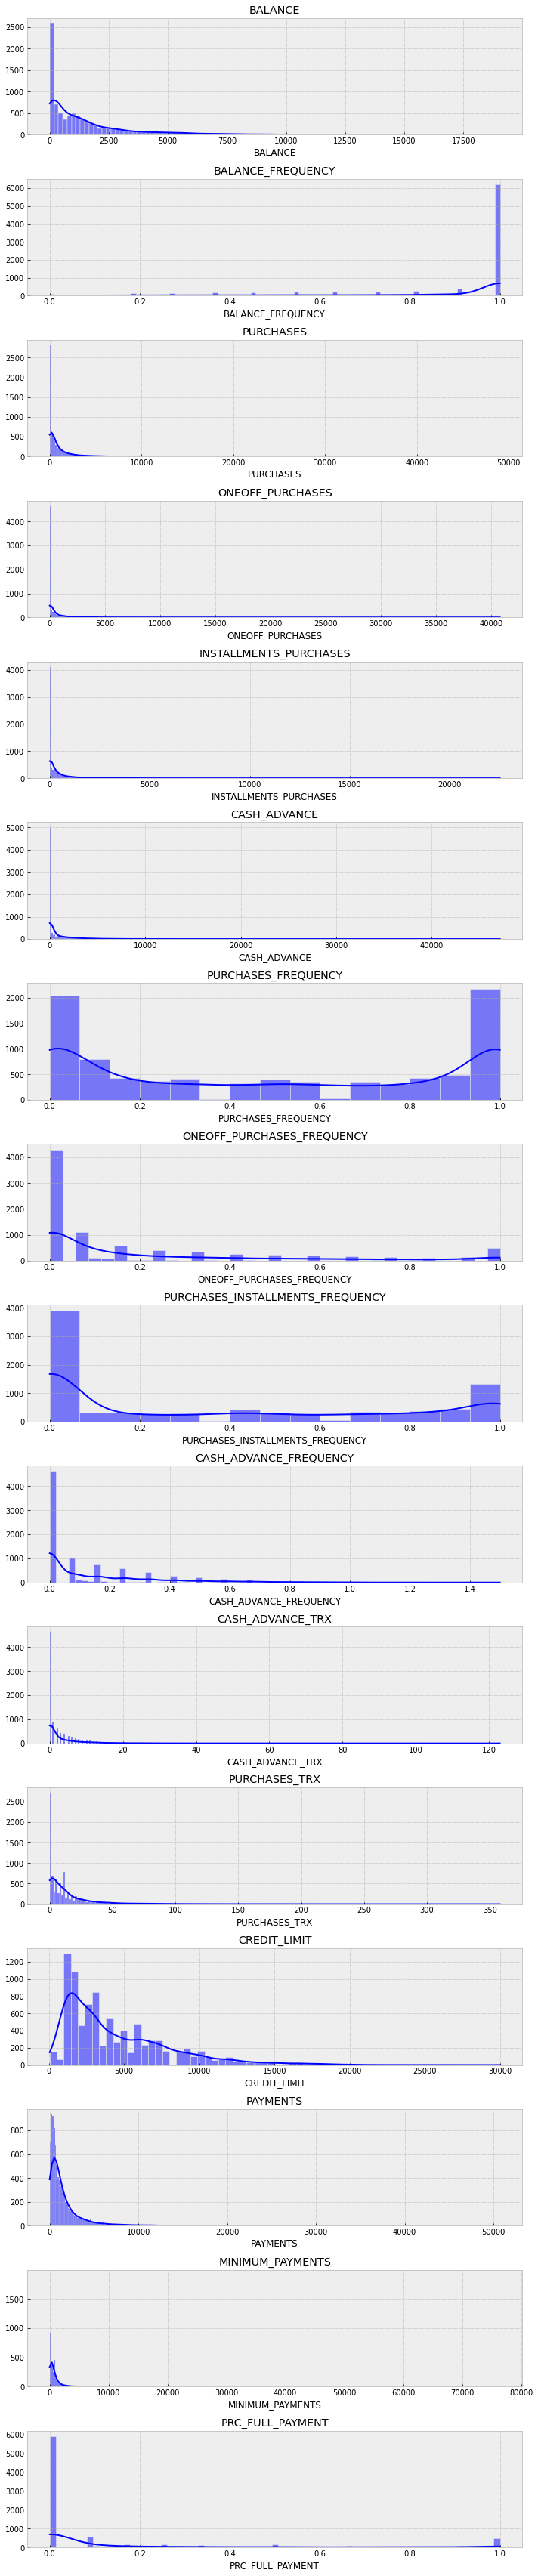

In [16]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.histplot(x=creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
  plt.ylabel('')
plt.tight_layout();

Alguns insights que podemos tirar na análise exploratória:

- A média do saldo em conta (balance) é de 1500 dólares

- 'Balance_Frequency' para a maioria dos clientes é atualizada frequentemente (valor próximo a 1) 

- Para a frequencia de compras (purchase_frequency), existem dois grupos distintos de clientes. 

- Quanto ao 'ONEOFF_PURCHASES_FREQUENCY' e 'PURCHASES_INSTALLMENT_FREQUENCY', a maioria dos clientes não fazem com frequência
- Um número muito pequeno de clientes paga o valor total da conta do cartão de crédito total (PRC_FULL_PAYMENT próximo de 0)
- O crédito limite médio é cerca de 4500 dólares, o valor mínimo é 50 dólares e o maior valor é 30 mil dólares

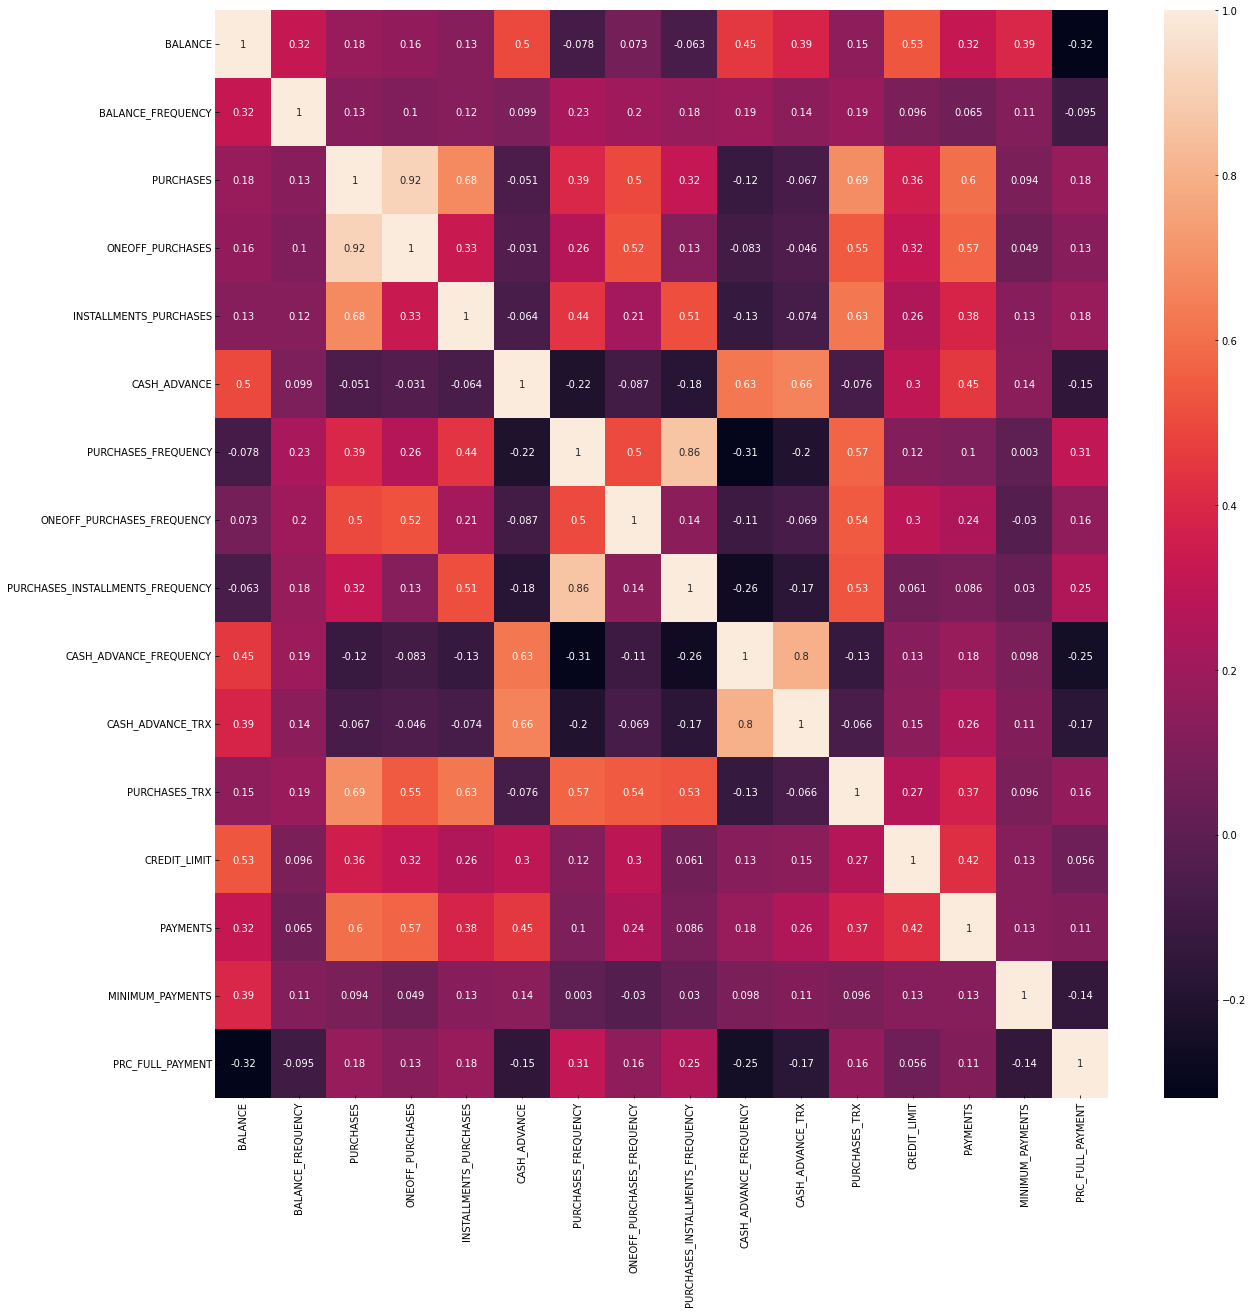

In [17]:
# Analisando o grau de correlação entre as variáveis
correlacao = creditcard_df.corr()

# Para facilitar a visualização dos graus de correlação, criaremos um mapa de calor 
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlacao, annot=True);

# Normalização das variáveis númericas

- Uma das estapas do tratamento de dados é a normalização das variáveis, deixando-as em uma mesma escala.

- O objetivo é evitar que o algoritmo fique enviesado e dê mais importância para as variáveis com maior ordem de grandeza (maior variância).

- Um exemplo é a diferença das escalas das variáveis `PAYMENTS` (0 a 50721) e `BALANCE_FREQUENCY` (0 a 1). Sem a aplicação da normalização, o algoritmo entenderia que a a variável `PAYMENTS` é mais significativa apenas pela diferença nas escalas

In [18]:
# Vizualiando os valores mínimo e máximo da variável 'BALANCE' 
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [19]:
# Aplicamos o método Standard Scaler e criames um Dataframe com as colunas com os valores normalizados

scaler = StandardScaler()
creditcard_df_scaled = pd.DataFrame(scaler.fit_transform(creditcard_df), columns=creditcard_df.columns)

In [20]:
creditcard_df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551


## Definindo o número de clusters

- Antes de aplicar o Kmeans, precisamos definir o número de clusters ou grupos, em que iremos dividir o dataset, e para isso, usaremos o **método do cotovelo**
- Esse método roda o KMeans para quantidades diferentes de clusters e diz qual dessas quantidades é o número ótimo de clusters.
- O que geralmente acontece ao aumentar a quantidade de clusters no KMeans é que as diferenças entre clusters se tornam muito pequenas, e as diferenças das observações intra-clusters vão aumentando.
- Assim, é preciso achar um equilíbrio em que as observações que formam cada agrupamento sejam o mais homogêneas possível e que os agrupamentos formados sejam o mais diferentes um dos outros.

In [21]:
# Iremos criar uma função que retorne uma lista com o valor do wcss/inertia (média das distâncias de cada ponto em relação ao centro do cluster)
# Para cada quantidade de clusters (1 a 10)
# Quanto menor o wcss/inertia, melhor

def calcular_wcss():
  wcss_1 = []
  range_values = range(1, 20)
  for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    wcss_1.append(kmeans.inertia_)
  return wcss_1

# Atribuindo o retorno da função criada a uma variável
wcss_1 = calcular_wcss()

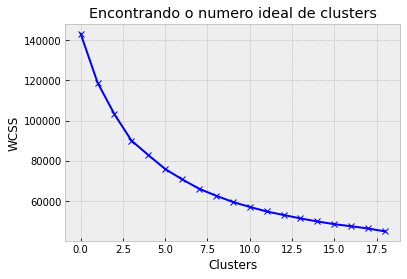

In [22]:
# Vamos plotar um gráfico com a relação entre os valores do WCSS e o número de cluster

plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.title('Encontrando o numero ideal de clusters');

- Em conjunto com o método do cotovelo, vamos usar o **método da silhueta** para definir o número ideal de clusters.
- Esse método calcula a distância média entre uma amostra e o cluster mais próximo do qual a amostra não faz parte.
- O melhor valor é 1 e o pior valor é -1. Valores próximos a 0 indicam clusters sobrepostos. Valores negativos geralmente indicam que uma amostra foi atribuída ao cluster errado, pois um cluster diferente é “mais semelhante”.

In [23]:
# Importando o método da silhueta

from sklearn.metrics import silhouette_score
  
  
num_de_clusters = [4, 5, 6, 7, 8]
  
for n_clusters in num_de_clusters:
  
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(creditcard_df_scaled)
  
    # O silhouette_score dá a média dos valores de toda a amostra.
    silhouette_avg = silhouette_score(creditcard_df_scaled, cluster_labels)
  
    print("Para o número de clusters =", n_clusters,
          " A média do silhouette_score é:", silhouette_avg)

Para o número de clusters = 4  A média do silhouette_score é: 0.21672750730006185
Para o número de clusters = 5  A média do silhouette_score é: 0.21237521844546567
Para o número de clusters = 6  A média do silhouette_score é: 0.2243515637282626
Para o número de clusters = 7  A média do silhouette_score é: 0.23114971213507407
Para o número de clusters = 8  A média do silhouette_score é: 0.22206675597211606



O número ideal k de divisões do dataset é 7 clusters, pois foi o que teve o maior valor (0.23) Agora já podem criar o modelo K-means

## Agrupamento com k-means

In [24]:
# Instanciando o modelo com o número de clusters igual a 7
# e treinando o com o nosso dataset normalizado

kmeans = KMeans(n_clusters=7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [25]:
# As labels (0, 1, 2, 3, 4, 5, 6) indicam qual dos sete clusters cada registro do dataset pertence

pd.Series(labels).value_counts()

3    2931
1    2190
0    1284
4    1211
2     952
6     359
5      23
dtype: int64

In [26]:
# o centro do cluster, ou centróide, é o 'endereço' definido por um valor de cada variável 
kmeans.cluster_centers_

array([[-6.97842957e-01, -2.14726585e+00, -3.15333215e-01,
        -2.34458253e-01, -3.14756950e-01, -3.05021207e-01,
        -5.71983908e-01, -4.35870440e-01, -4.64060643e-01,
        -4.87320317e-01, -3.59981441e-01, -4.27990249e-01,
        -2.06526242e-01, -2.08455429e-01, -2.54785616e-01,
         2.57410185e-01],
       [-3.91691887e-01,  3.05431853e-01, -6.42010949e-02,
        -2.56551214e-01,  3.19478876e-01, -3.59272767e-01,
         9.76255597e-01, -4.14023992e-01,  1.16958417e+00,
        -4.60907827e-01, -3.56980098e-01,  1.35731094e-01,
        -3.20411657e-01, -2.43074730e-01, -6.98921826e-02,
         3.51267840e-01],
       [ 1.60207804e+00,  3.81167849e-01, -2.25753720e-01,
        -1.58383355e-01, -2.42882766e-01,  1.94625112e+00,
        -4.90573149e-01, -2.11406337e-01, -4.37909685e-01,
         1.89729529e+00,  1.84298024e+00, -2.80245937e-01,
         9.72310788e-01,  7.36641457e-01,  4.84132142e-01,
        -3.96162775e-01],
       [-1.52817914e-02,  3.68155139e

In [27]:
# Vamos transfomar esses 'endereços' do centro do cluster em um dataframe.
# Os valores estão normalizados, eis que usamos o dataframe foi normalizado anteriormente no algoritmo K-means

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-0.697843,-2.147266,-0.315333,-0.234458,-0.314757,-0.305021,-0.571984,-0.435870,-0.464061,-0.487320,-0.359981,-0.427990,-0.206526,-0.208455,-0.254786,0.257410
1,-0.391692,0.305432,-0.064201,-0.256551,0.319479,-0.359273,0.976256,-0.414024,1.169584,-0.460908,-0.356980,0.135731,-0.320412,-0.243075,-0.069892,0.351268
2,1.602078,0.381168,-0.225754,-0.158383,-0.242883,1.946251,-0.490573,-0.211406,-0.437910,1.897295,1.842980,-0.280246,0.972311,0.736641,0.484132,-0.396163
3,-0.015282,0.368155,-0.359877,-0.242281,-0.405710,-0.079334,-0.868532,-0.398055,-0.770425,0.143790,-0.020219,-0.488569,-0.344753,-0.268209,-0.027779,-0.453675
4,-0.124062,0.391362,0.524238,0.644724,0.054885,-0.326992,0.967476,1.849208,0.193532,-0.400996,-0.328201,0.607523,0.425667,0.128704,-0.157644,0.405568
5,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317
6,1.056386,0.465598,2.486106,1.791496,2.587073,-0.134653,1.165969,1.530205,1.276907,-0.275278,-0.142997,3.099959,1.290619,1.453835,0.742522,0.248614


In [28]:
# Vamos agora aplicar um método que reverte a normalização das variáveis. 
# Assim temos novamente seus valores reais (ainda o dataframe dos 'endereços' do centro de cada cluster)

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,111.973618,0.368603,329.490560,203.284693,126.436840,339.227393,0.260786,0.072429,0.180008,0.037626,0.792218,4.071595,3743.022486,1129.685810,270.439411,0.229003
1,749.201229,0.949625,866.038205,166.614902,699.968429,225.459337,0.882169,0.078946,0.829260,0.042912,0.812700,18.083600,3328.660751,1029.466326,701.325759,0.256454
2,4899.065028,0.967566,520.878531,329.553442,191.431773,5060.250634,0.293460,0.139391,0.190401,0.514812,15.825813,7.743966,8032.113899,3865.648692,1992.456077,0.037844
3,1532.667069,0.964483,234.321344,190.300972,44.189158,812.503806,0.141767,0.083710,0.058251,0.163918,3.110846,2.565825,3240.097772,956.704210,799.467855,0.021023
4,1306.250509,0.969981,2123.247179,1662.547684,460.699495,293.154653,0.878646,0.754112,0.441352,0.054901,1.009098,29.810587,6043.200241,2105.729460,496.823792,0.272336
5,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316
6,3763.252917,0.987566,6314.808412,3565.953649,2750.526072,696.496483,0.958310,0.658947,0.871913,0.080058,2.272981,91.763231,9190.250696,5941.854453,2594.623805,0.226430


- Já poderíamos tirar algumas conclusões desse dataframe com as médias de cada valor do centro dos clusters. 
- Porém, vamos melhorar primeiro o nosso algoritmo, assim poderemos tirar insights mais apurados

In [29]:
# Vamos adicionar uma coluna chamada 'cluster' no dataframe creditcard_df
# Indicando o grupo a que pertence cada cliente

creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,3


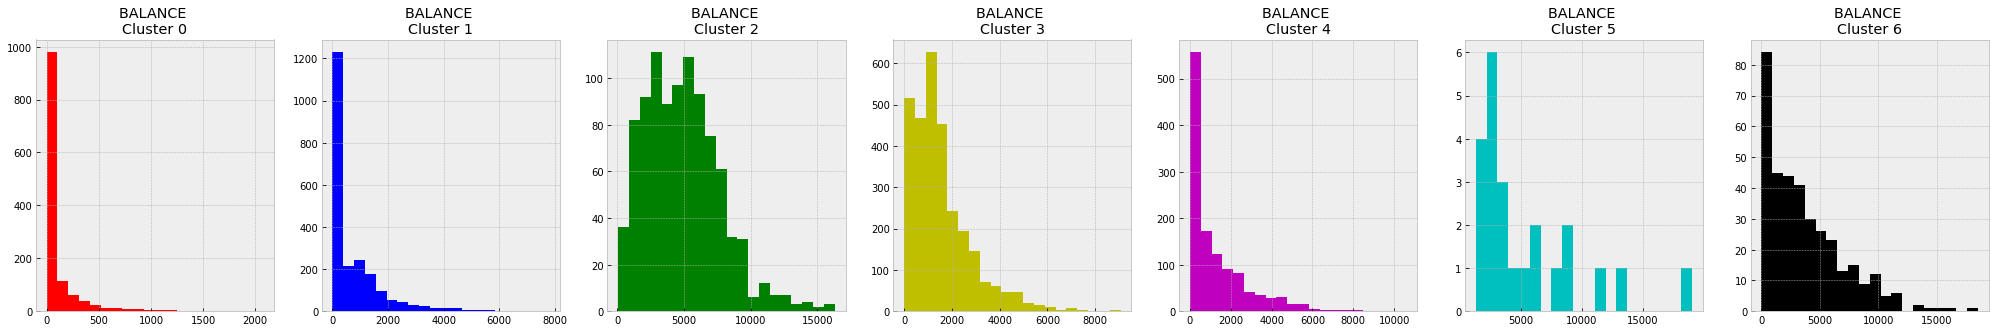

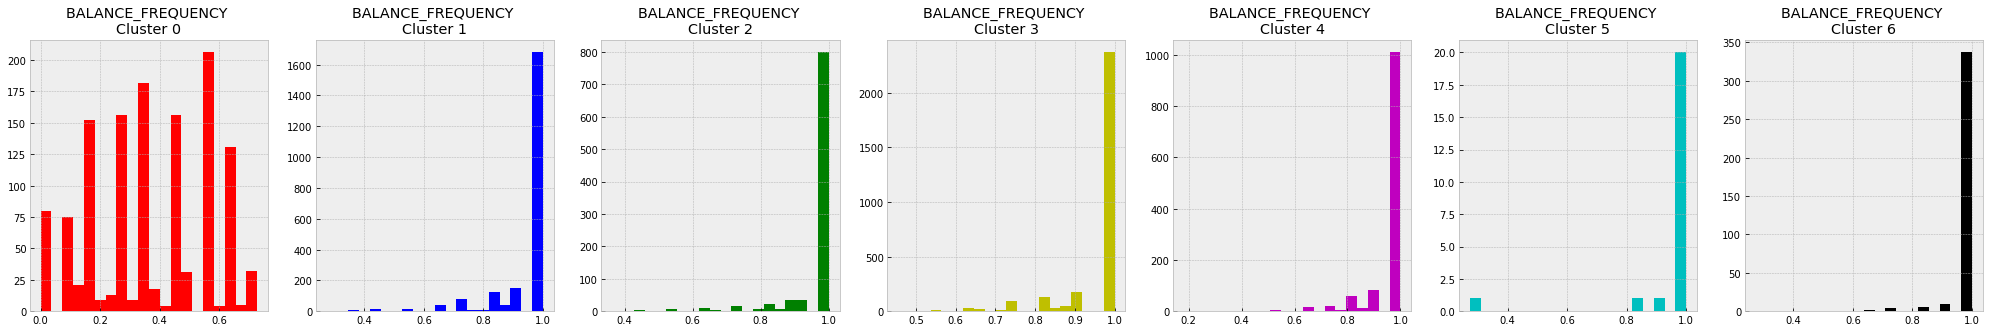

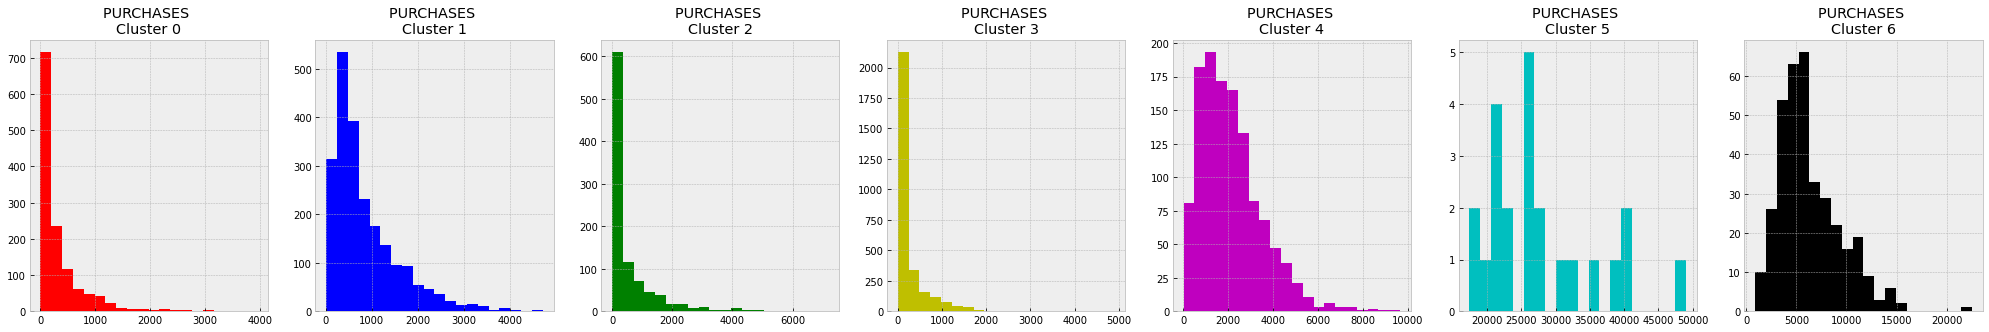

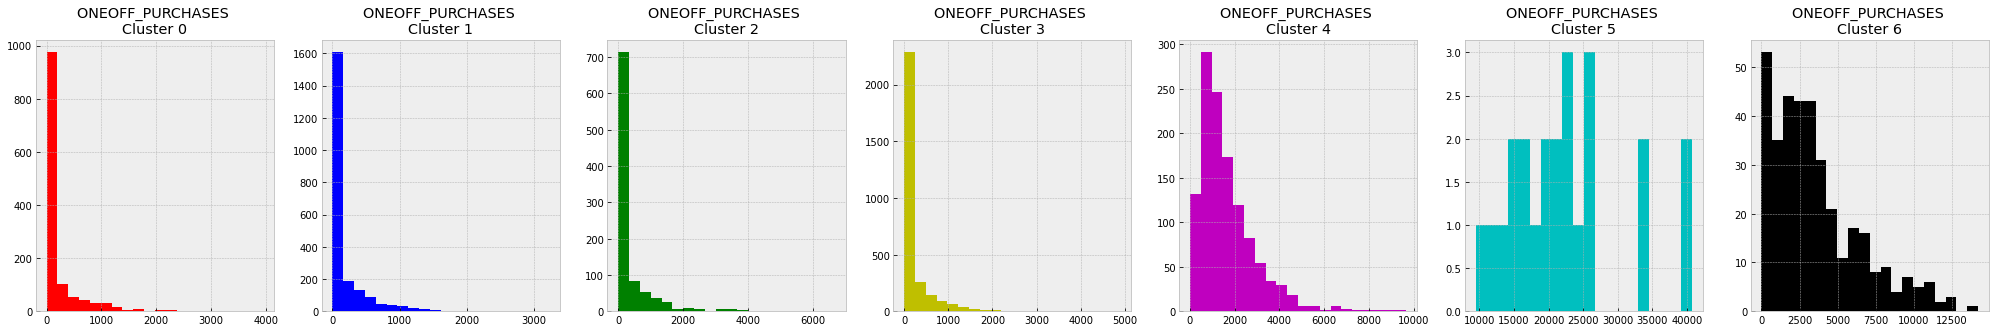

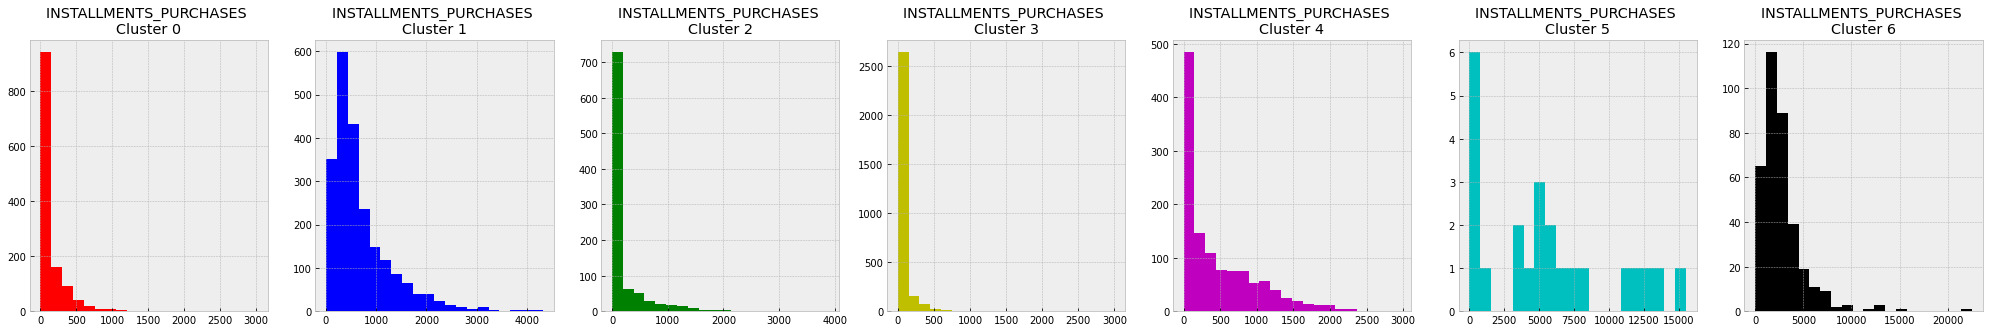

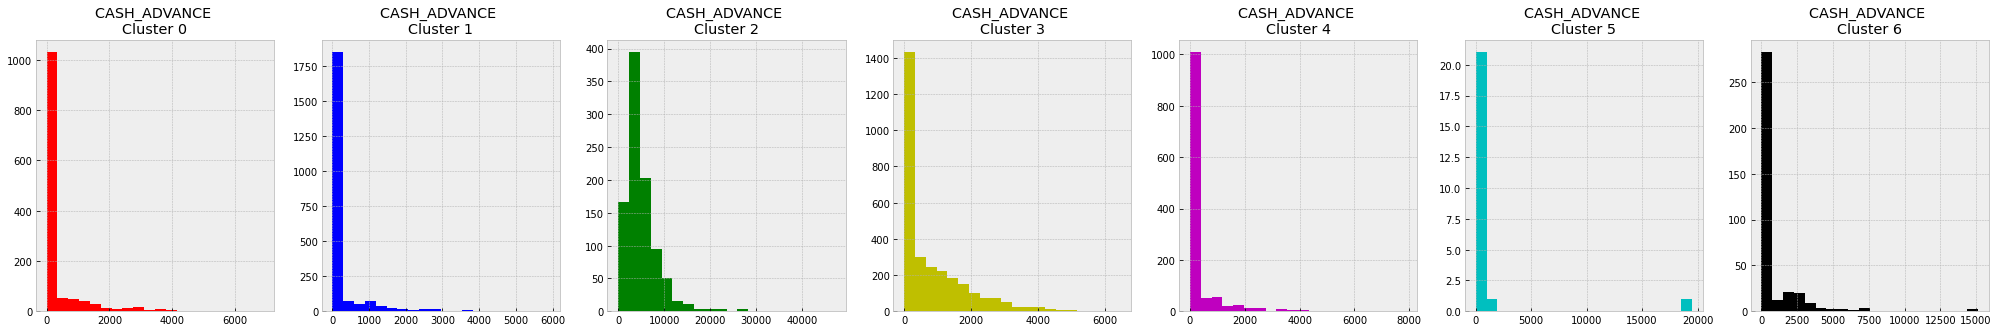

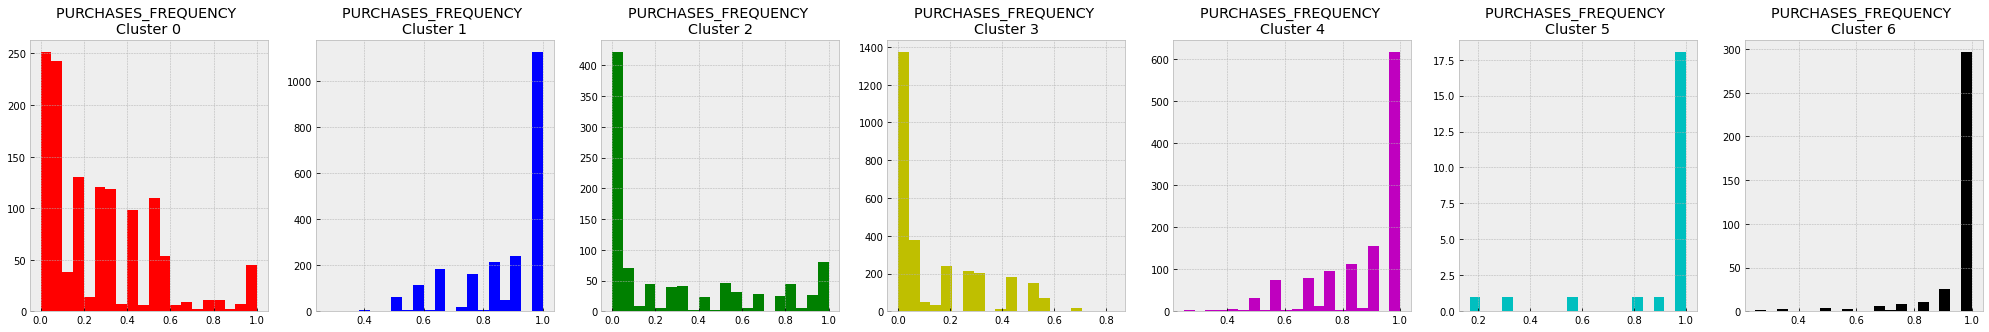

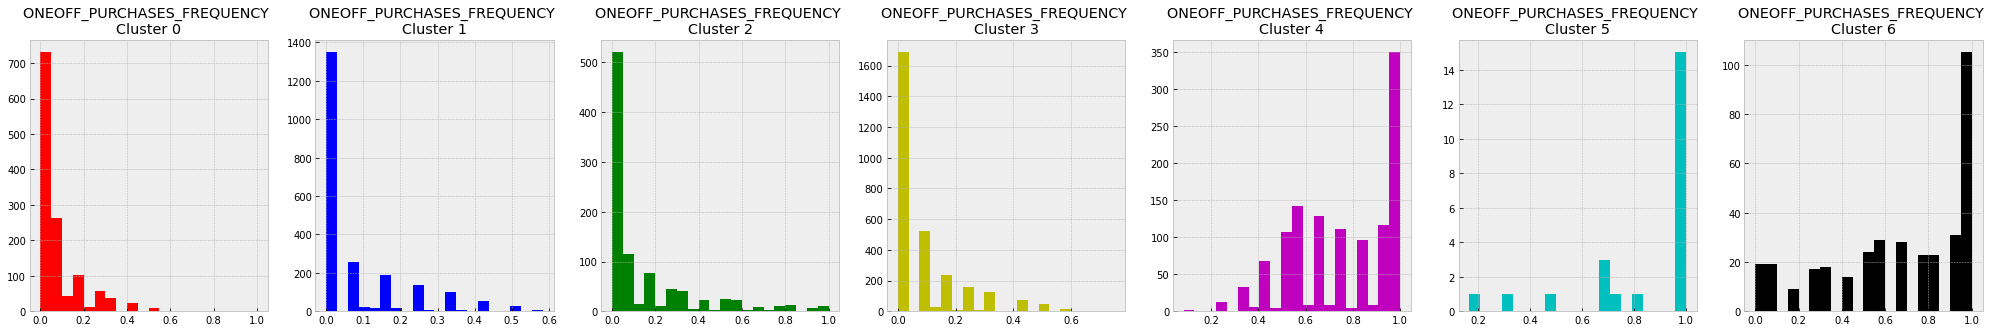

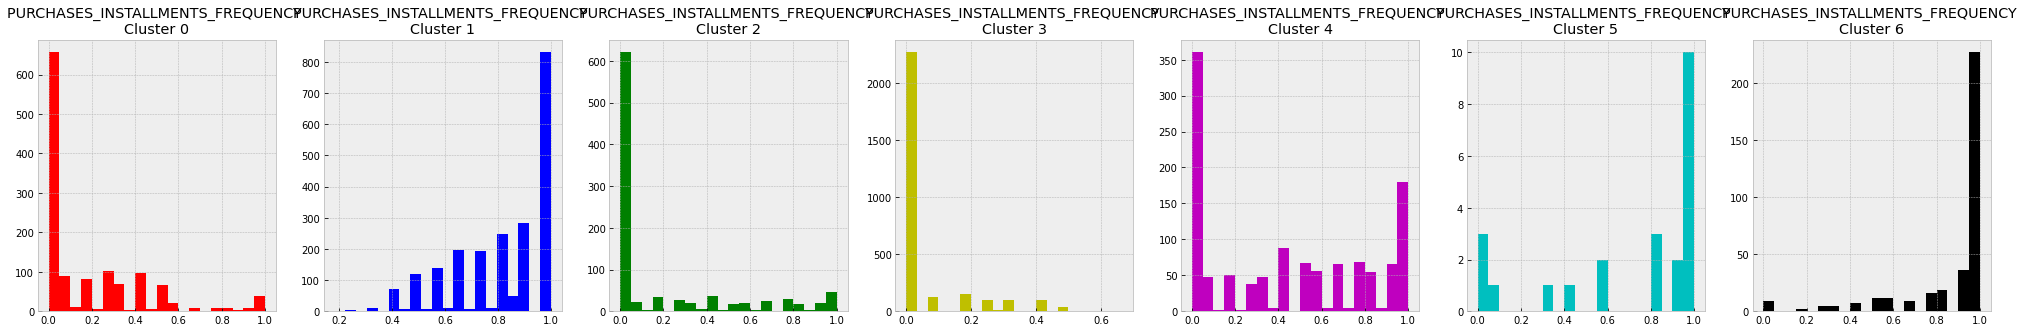

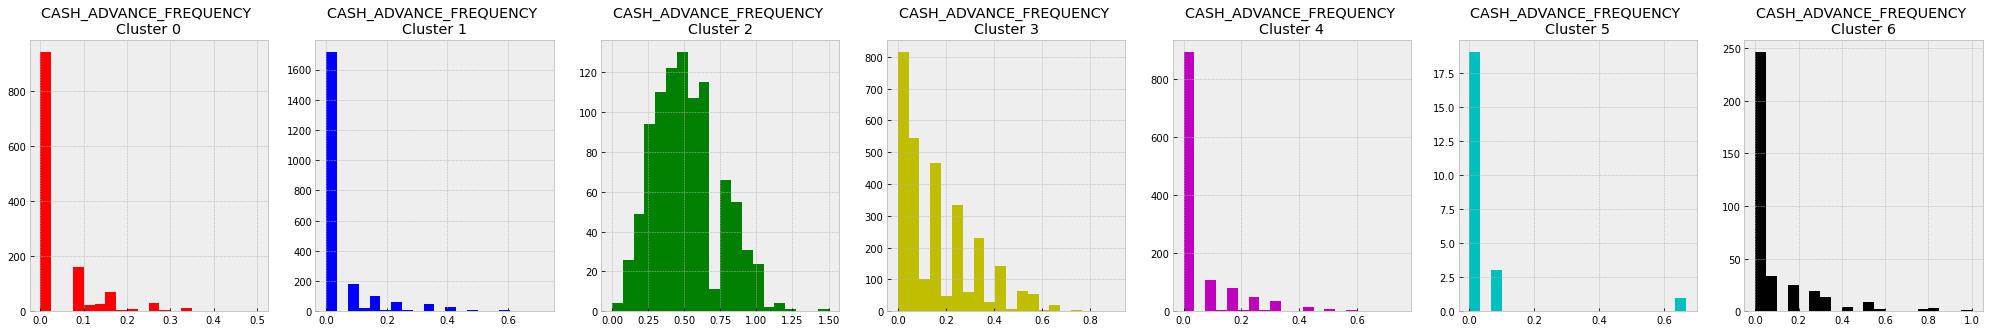

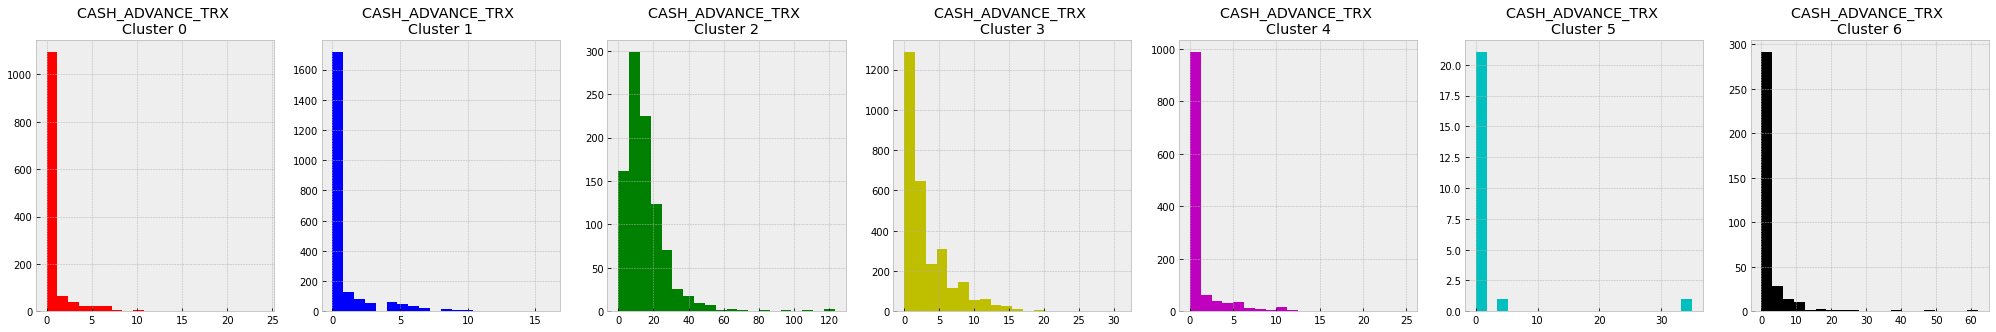

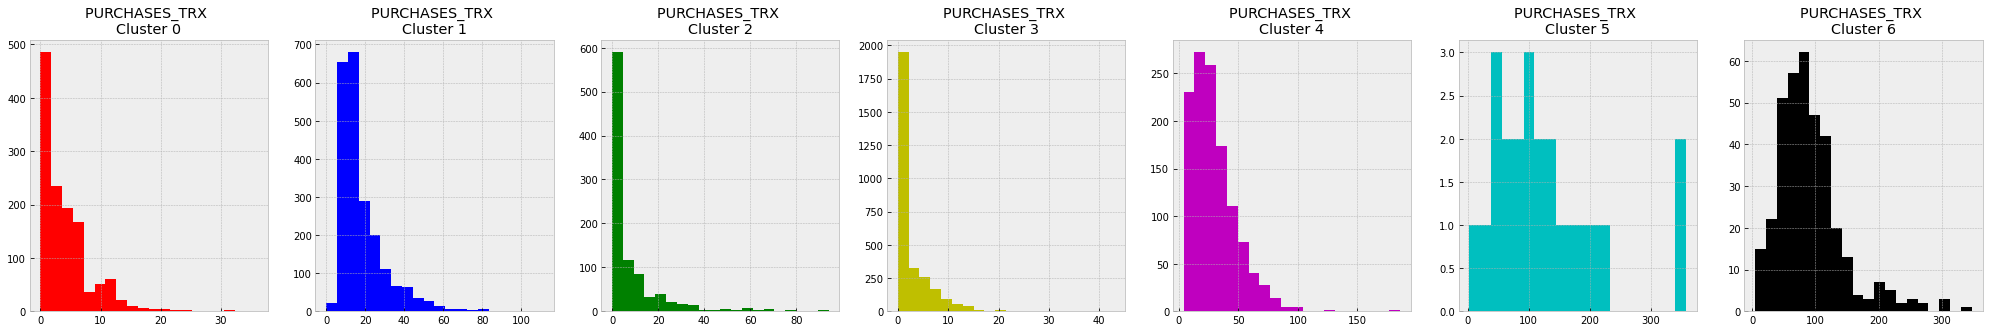

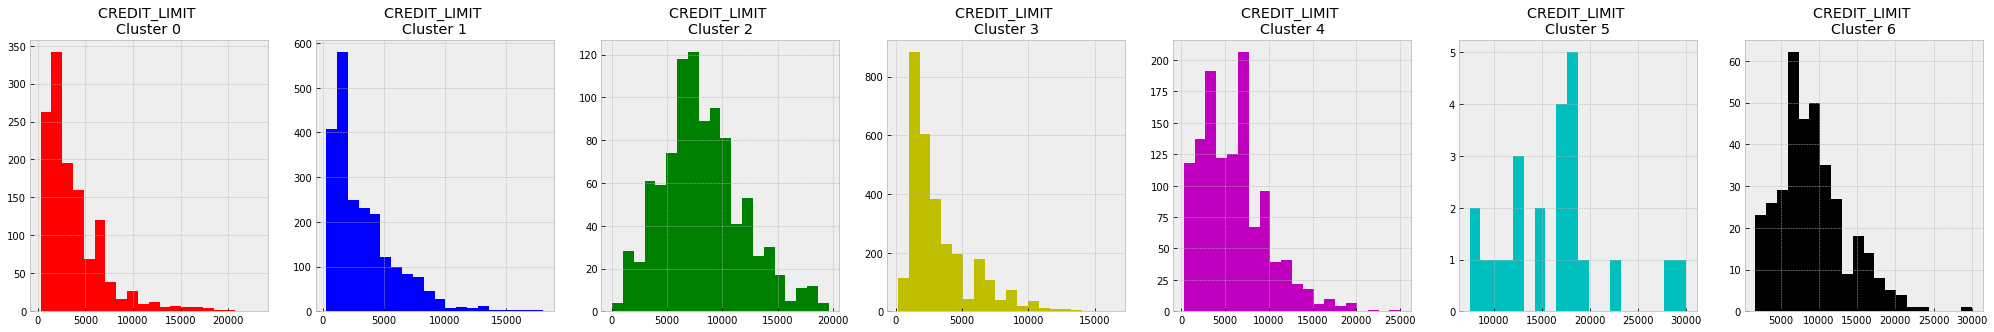

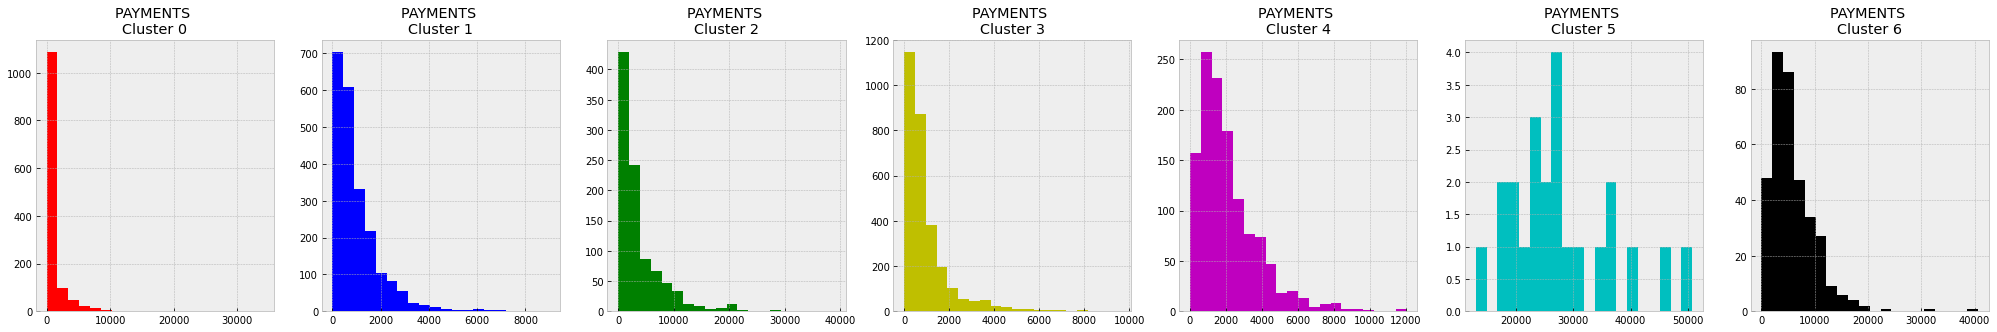

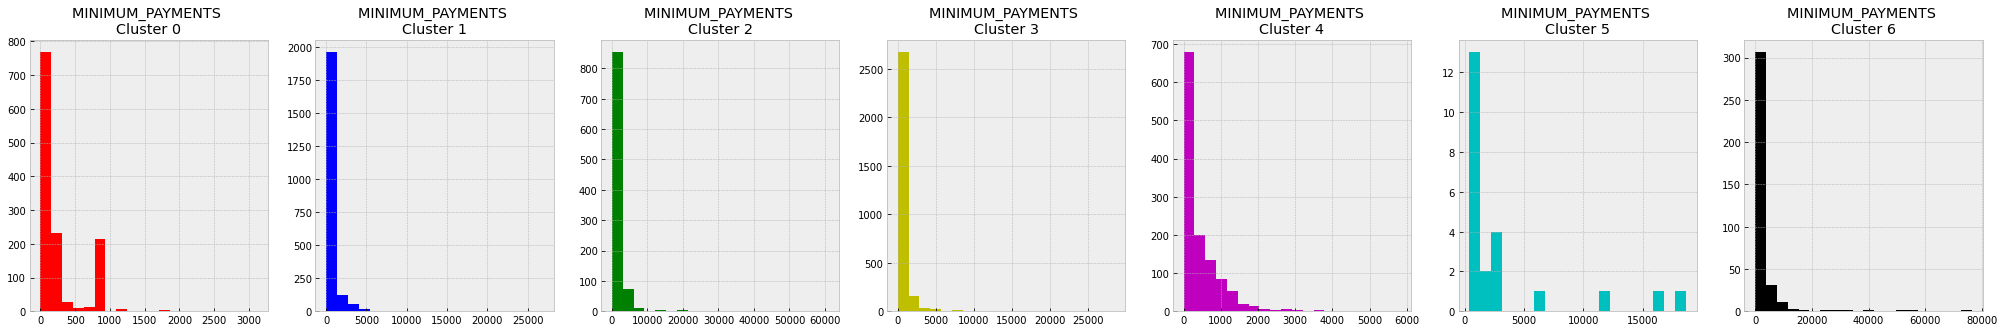

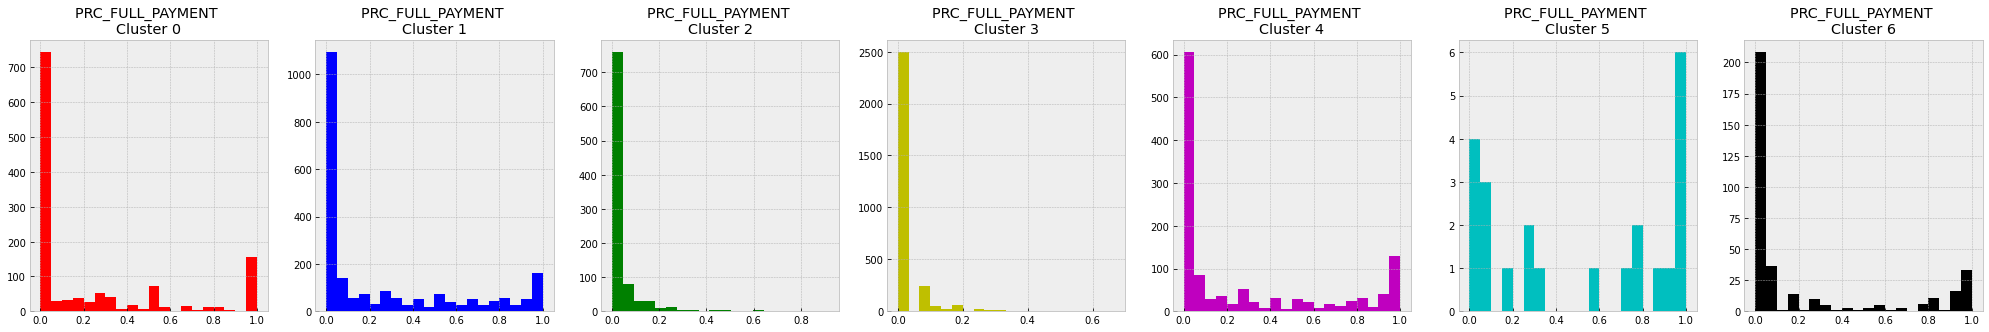

In [30]:
# Vamos plotar alguns gráficos de distribuição de frequeência de cada uma das variáveis, de acordo com o cluster correspondente

color = ['r', 'b', 'g', 'y', 'm', 'c', 'k']
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j,c in zip(range(7), color):
    plt.subplot(1, 7, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20, color=c)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [31]:
# Vamos criar um dataframe ordenado por clusters

credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
1886,408.948673,0.272727,0.00,0.00,0.00,1871.859929,0.000000,0.000000,0.000000,0.083333,1,0,10000.0,3902.376688,124.094651,0.090909,0
2863,54.952957,0.636364,470.12,0.00,470.12,0.000000,0.333333,0.000000,0.333333,0.000000,0,4,10000.0,1042.208975,178.107513,0.666667,0
1276,144.129221,0.727273,949.59,272.00,677.59,0.000000,0.500000,0.250000,0.333333,0.000000,0,11,4000.0,999.711434,121.912794,0.100000,0
5874,12.683677,0.363636,31.68,0.00,31.68,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,4000.0,210.141652,140.456214,0.000000,0
4231,13.649888,0.363636,129.16,129.16,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,15000.0,375.360990,135.625973,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,1050.527038,0.818182,8880.59,2269.45,6611.14,0.000000,1.000000,0.333333,1.000000,0.000000,0,64,8500.0,7713.262155,266.749027,0.000000,6
698,255.052529,1.000000,3267.03,1439.07,1827.96,0.000000,1.000000,1.000000,1.000000,0.000000,0,101,6000.0,2841.850383,173.710118,1.000000,6
4462,4976.028578,1.000000,900.87,0.00,900.87,0.000000,1.000000,0.000000,1.000000,0.000000,0,162,5500.0,92.865469,50260.759470,0.000000,6
4456,289.512368,1.000000,4185.94,898.14,3287.80,0.000000,1.000000,0.666667,1.000000,0.000000,0,90,6000.0,3836.068440,175.475265,0.909091,6


# Aplicação de PCA (principal component analysis) e visualização dos resultados

In [32]:
# O PCA (Principal Component Analysis) reduz a dimensionalidade do dataframe, perdendo o mínimo de informação possível
# Vamos usa-lo para reduzir o dataframe para duas variáveis, para podermos ver os gráficos dos clusters em duas dimensões

pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.718893  , -1.07294124],
       [-1.16930317,  2.50931462],
       [ 0.93841324, -0.38259903],
       ...,
       [-0.59387961, -1.82811613],
       [-2.00767135, -0.67376751],
       [-0.2179307 , -0.41848628]])

In [33]:
# Criando um dataframe apenas com as duas variáveis principais

pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.718893,-1.072941
1,-1.169303,2.509315
2,0.938413,-0.382599
3,-0.907502,0.045856
4,-1.637831,-0.684976


In [34]:
# Podemos ver que o dataframe reduzido tem apenas duas colunas (dois componentes principais) após a aplicação do PCA
# Mas ainda possui o mesmo número de linhas que o dataset original

pca_df.shape, creditcard_df.shape

((8950, 2), (8950, 16))

In [35]:
# Vamos unir o dataframe PCA com a coluna de cluster, indicando a qual cluster pertence cada registro
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.718893,-1.072941,3
1,-1.169303,2.509315,2
2,0.938413,-0.382599,4
3,-0.907502,0.045856,3
4,-1.637831,-0.684976,3


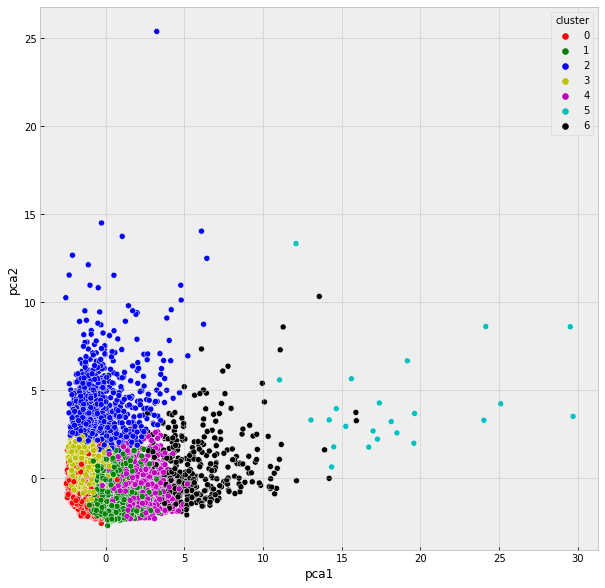

In [36]:
# Plotando um gráfico de dispersão para visualizarmos a posição de cada cluster
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['r', 'g', 'b', 'y', 'm', 'c', 'k'])

Os clusters parecem não estar muito bem definidos, pois há muita sobreposição entre pontos de cores diferentes.

Vamos tentar melhorar a divisão entre os clusters usando um tipo algoritmo de rede neural chamado Autoencoders

## Aplicação de autoencoders

<img src="autoencoder_schema.png" align="left">

Autoencoders é um tipo de algoritmo de rede neural artificial para redução de  dimensionalidade nos dados. 

Com restrições de dimensionalidade e esparsidade apropriadas, os autoencoders podem aprender projeções de dados mais interessantes que o PCA ou outras técnicas básicas.

Usaremos essa algoritmo para melhorar a divisão entre clusters feita pelo K-means 

In [38]:
# O número de features do dataset será o deve ser o número de "neurônios" de entrada da Rede Neural Autoencoder
creditcard_df_scaled.shape

(8950, 16)

In [39]:
# 16 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 16from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [40]:
# Criaremos um rede neural com duas camadas 
input_df = Input(shape=(16,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(16)(x)

In [41]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [42]:
# encoder
encoder = Model(input_df, encoded)

In [45]:
# Representaçã0 da rede neural
# A camada 'dense_2' é o dataset com as dimensões reduzidas, apenas dez colunas (16 -> 10 -> 16)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 500)               8500      
                                                                 
 dense_1 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_2 (Dense)             (None, 10)                20010     
                                                                 
 dense_3 (Dense)             (None, 2000)              22000     
                                                                 
 dense_4 (Dense)             (None, 500)               1000500   
                                                                 
 dense_5 (Dense)             (None, 16)                8016  

In [46]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [47]:
# Aplicando o autoencoder
autoencoder.fit(creditcard_df_scaled.values, 
                creditcard_df_scaled.values, 
                epochs = 50, 
                batch_size=128,
                verbose=1)

Epoch 1/50
70/70 [==============================] - 5s 61ms/step - loss: 0.2751
Epoch 2/50
70/70 [==============================] - 4s 59ms/step - loss: 0.0612
Epoch 3/50
70/70 [==============================] - 4s 59ms/step - loss: 0.0375
Epoch 4/50
70/70 [==============================] - 4s 58ms/step - loss: 0.0266
Epoch 5/50
70/70 [==============================] - 4s 59ms/step - loss: 0.0244
Epoch 6/50
70/70 [==============================] - 4s 59ms/step - loss: 0.0202
Epoch 7/50
70/70 [==============================] - 4s 58ms/step - loss: 0.0213
Epoch 8/50
70/70 [==============================] - 4s 59ms/step - loss: 0.0249
Epoch 9/50
70/70 [==============================] - 5s 70ms/step - loss: 0.0201
Epoch 10/50
70/70 [==============================] - 4s 63ms/step - loss: 0.0179
Epoch 11/50
70/70 [==============================] - 4s 59ms/step - loss: 0.0155
Epoch 12/50
70/70 [==============================] - 4s 59ms/step - loss: 0.0146
Epoch 13/50
70/70 [==================

In [48]:
creditcard_df_scaled.shape

(8950, 16)

In [49]:
# Dataset após a aolicação do autoencoder
# Podemos ver que agora são apenas 10 colunas, e não mais 16
compact = encoder.predict(creditcard_df_scaled.values)
compact.shape

280/280 [==============================] - 1s 5ms/step


(8950, 10)

In [50]:
creditcard_df_scaled.values[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097])

In [51]:
compact[0]

array([0.27340502, 0.48247105, 0.04930787, 0.48861638, 1.0023009 ,
       0.29288325, 0.15812239, 0.        , 0.        , 0.17322528],
      dtype=float32)

In [52]:
# Vamos comparar o gráfico entre o wcss do dataset após a aplicação do autoencoder
# Com o gráfico que fizemos antes da aplicação
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

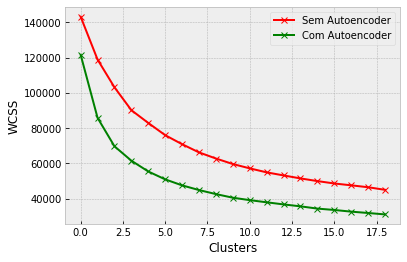

In [53]:
plt.plot(wcss_1, 'bx-', color = 'r', label='Sem Autoencoder')
plt.plot(wcss_2, 'bx-', color = 'g', label='Com Autoencoder')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.legend(loc="upper right");

In [54]:
# Vamos analisar os valores do método da silhueta após a aplicação do Autoencoders

num_de_clusters = [3, 4, 5, 6, 7, 8]
  
for n_clusters in num_de_clusters:
  
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(compact)
  
    silhouette_avg = silhouette_score(compact, cluster_labels)
  
    print("Para o número de clusters =", n_clusters,
          " A média do silhouette_score é:", silhouette_avg)

Para o número de clusters = 3  A média do silhouette_score é: 0.436676
Para o número de clusters = 4  A média do silhouette_score é: 0.36833137
Para o número de clusters = 5  A média do silhouette_score é: 0.35643324
Para o número de clusters = 6  A média do silhouette_score é: 0.23613213
Para o número de clusters = 7  A média do silhouette_score é: 0.2429308
Para o número de clusters = 8  A média do silhouette_score é: 0.24143255


In [55]:
# O número ótimo de clusters agora é apenas 3
# O que é indicado pelo gráfico do método do cotovelo e pelo método da silhueta  
kmeans = KMeans(n_clusters=3)
kmeans.fit(compact)

KMeans(n_clusters=3)

In [56]:
labels = kmeans.labels_
labels, labels.shape

(array([0, 0, 0, ..., 0, 0, 2], dtype=int32), (8950,))

In [57]:
# Vamos juntar os labels de cada um dos três clusters (0, 1, 2) ao Dataframe original 

df_cluster_auto = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_auto.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,0


In [58]:
# Aplicando o PCA novamente para podermos ver o gráfico da nova divisão
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_auto_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_auto_df.head()

,pca1,pca2
0,-2.198101,-0.243452
1,0.664520,1.819490
2,-0.223026,-0.787490
3,-0.615716,-0.106302
4,-2.217855,-0.187692


In [59]:
pca_auto_df = pd.concat([pca_auto_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_auto_df.head()

,pca1,pca2,cluster
0,-2.198101,-0.243452,0
1,0.664520,1.819490,0
2,-0.223026,-0.787490,0
3,-0.615716,-0.106302,0
4,-2.217855,-0.187692,0


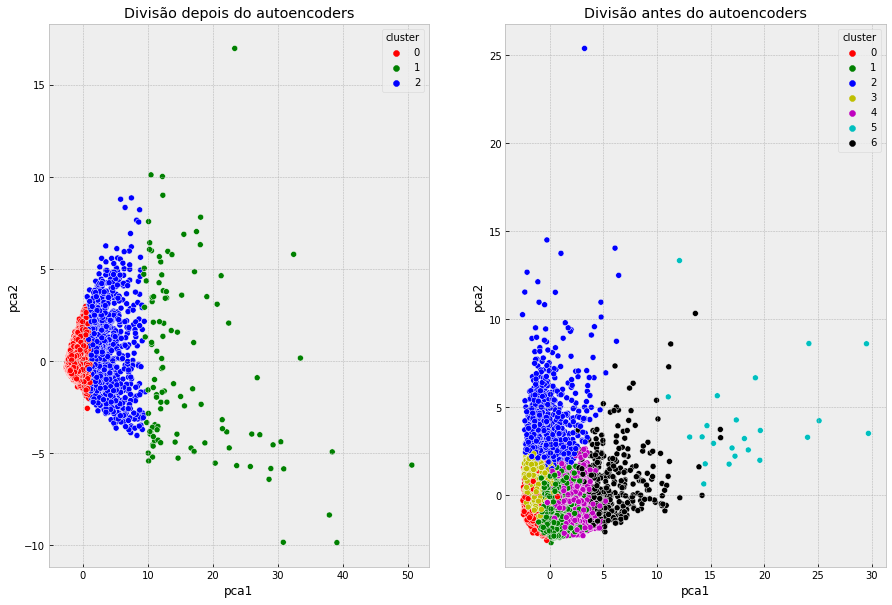

In [60]:
# Agora que aplicamos o PCA, já podemos ver o gráfico de dispersão após a aplicação do AutoEncoder

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.title('Divisão depois do autoencoders')
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_auto_df, palette = ['red', 'green', 'blue']);

plt.subplot(1,2,2)
plt.title('Divisão antes do autoencoders')
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['r', 'g', 'b', 'y', 'm', 'c', 'k']);


Aqui podemos ver que usando autoencoder, conseguimos que houvesse muito menos sobrepossição entre os clusters. Isto é bastante significativo, pois o objetivo deste projeto é dividir os clientes em grupos o mais heterogênios possíveis. Poderemos dizser que o cliente tem 3 

Here we can see that by using autoencoders I was able to make clusters of data with very less overlapping. This is more meaningful clustering/segmentations of the customers. I will now be able to tell my clients that they have 4 different types of customers and each can be targeted in a different way. Autoencoding really helped in this case.
So to summarize all the steps:
1. Load the data & just have a brief look at it. Try to find information(.info), use .describe. By doing so you will be able to get good understanding of the data. Try to understand all the features and what do they mean as this is very important to understand which features are the most important or which are the least important. If possible try to ask questions to the team/person who has provided you the dataset. This step is important in a real world project.
2. Do some exploratory data analysis (EDA). Find missing values. Handling missing values is a critical step. You have to ask youe self this question.
Is this value missing becuase it wasn't recorded or becuase it dosen't exist?

If a value is missing becuase it doens't exist (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be. These values you probalby do want to keep as NaN. On the other hand, if a value is missing becuase it wasn't recorded, then you can try to guess what it might have been based on the other values in that column and row. (This is called "imputation") :)

Make some really good graphs by extracting information from the data. As a data scientist you might be asked for presentations of your work/product. Beautiful graphs really helps a lot.
3. Now comes the Machine learning part. For this dataset I used unsupervised learning. Find the optimum number of clusters by using 'Elbow Method'. Apply Kmeans clustering and then use PCA dimensionality reduction technique to make a graph of your clusters.
4. Use Autoencoding technique to encode the original data and reduce its dimensions. Then use the reduced encoded data as a new input and follow step 3 again.

In [61]:
df_cluster_ordered = df_cluster_auto.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,0
5822,860.268175,1.000000,0.00,0.0,0.00,1974.202963,0.000000,0.000000,0.000000,0.333333,5,0,2500.0,749.789889,292.755072,0.0,0
5821,1114.384030,1.000000,1956.43,1423.8,532.63,521.664369,0.583333,0.083333,0.500000,0.083333,3,18,1800.0,836.108453,1238.531629,0.0,0
5820,11.896546,0.363636,86.00,86.0,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,8000.0,488.720214,85.079975,1.0,0
5819,994.231031,1.000000,487.60,0.0,487.60,38.690552,0.750000,0.000000,0.750000,0.083333,1,9,1000.0,755.610568,801.233778,0.0,0


In [62]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
6404,3279.867381,0.875000,6520.00,6520.00,0.0,0.000000,0.750000,0.750000,0.000000,0.000000,0,7,3500.0,3524.512662,523.422296,0.125000,2
6408,2184.965504,1.000000,0.00,0.00,0.0,2893.023143,0.000000,0.000000,0.000000,0.916667,26,0,8000.0,1730.364781,481.160634,0.000000,2
2240,3797.995726,1.000000,0.00,0.00,0.0,17278.538640,0.000000,0.000000,0.000000,0.833333,56,0,12000.0,15884.697460,1078.537276,0.166667,2
2235,931.674532,1.000000,2417.91,2303.91,114.0,3508.775536,0.583333,0.500000,0.166667,0.166667,9,21,8000.0,3468.393326,261.268016,0.000000,2
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,2


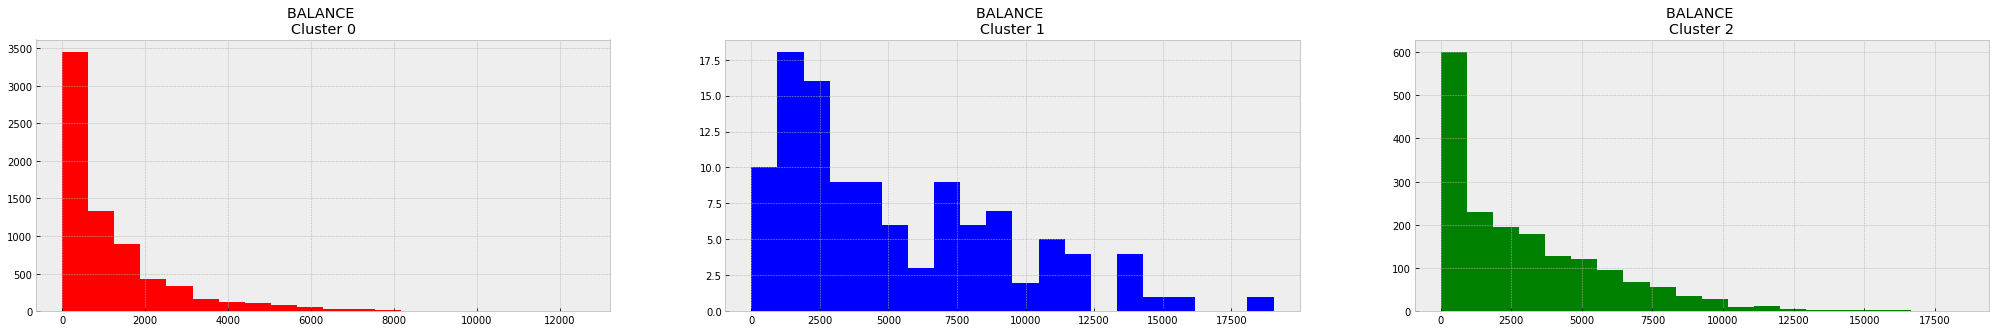

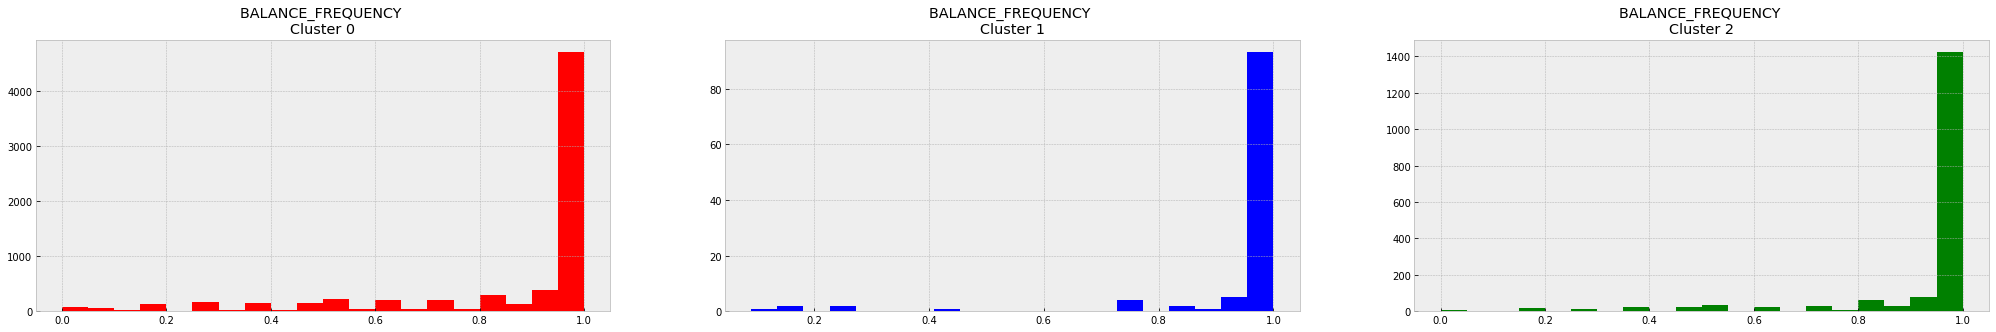

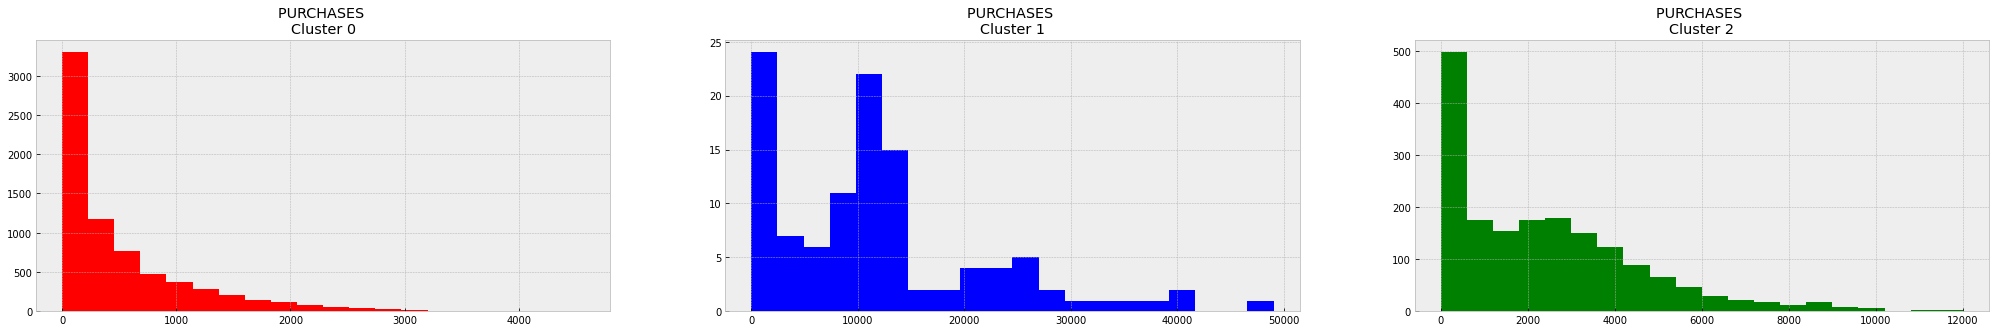

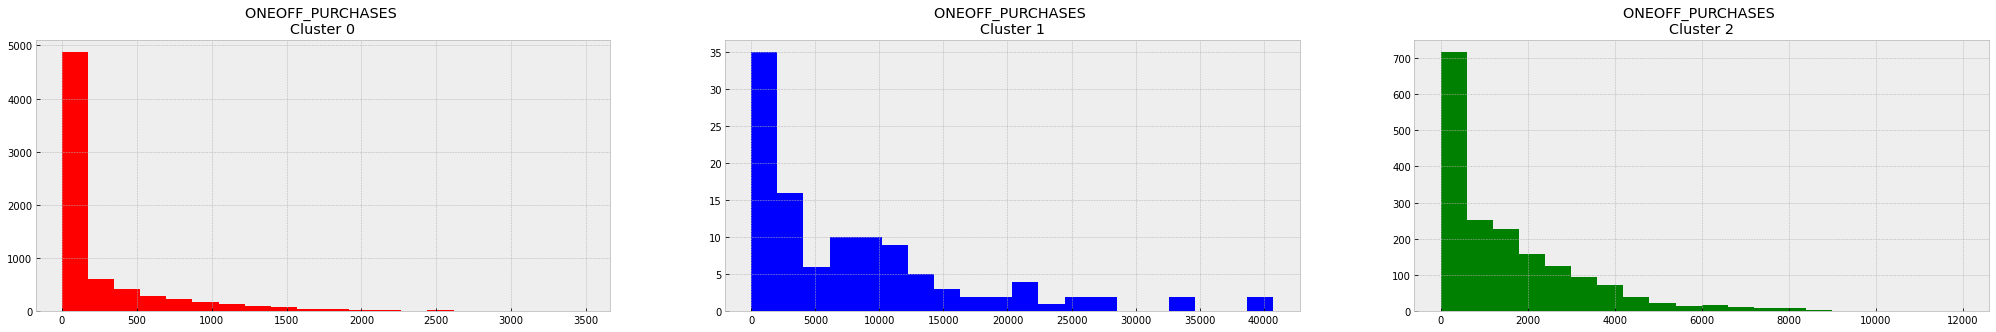

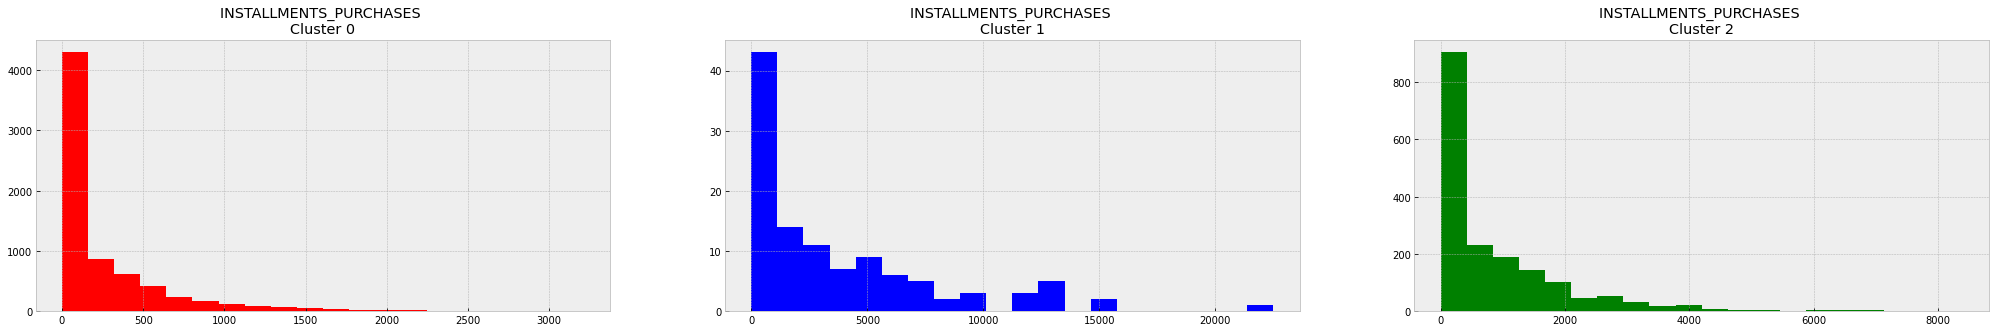

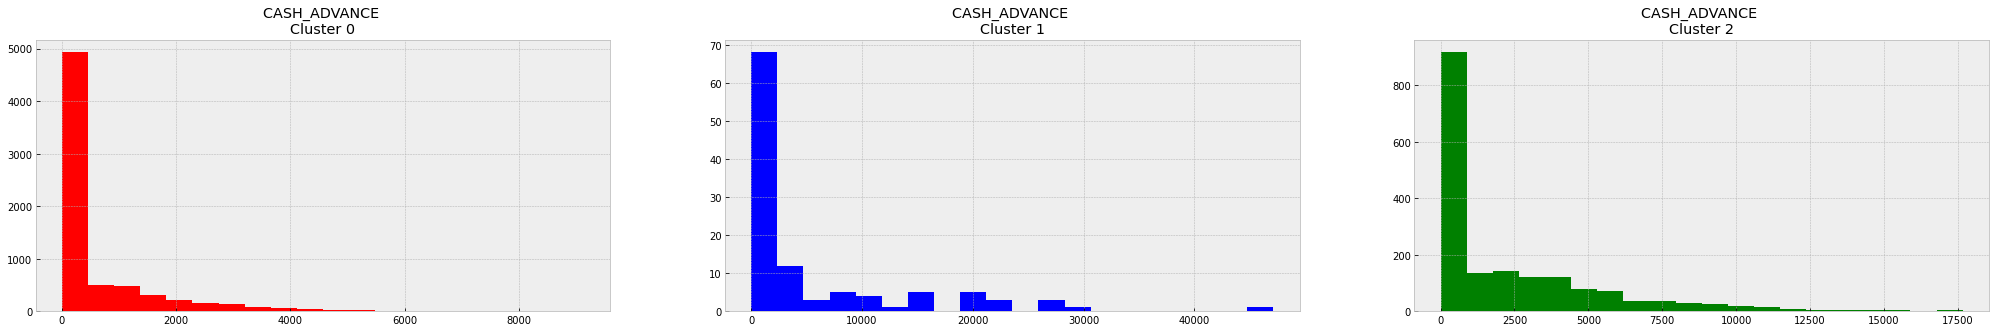

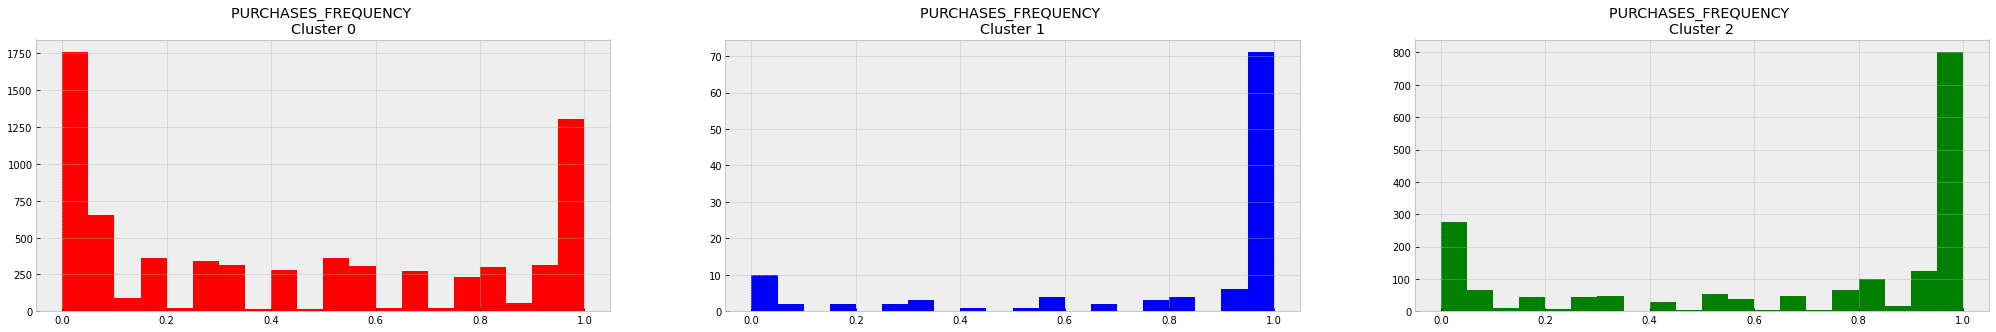

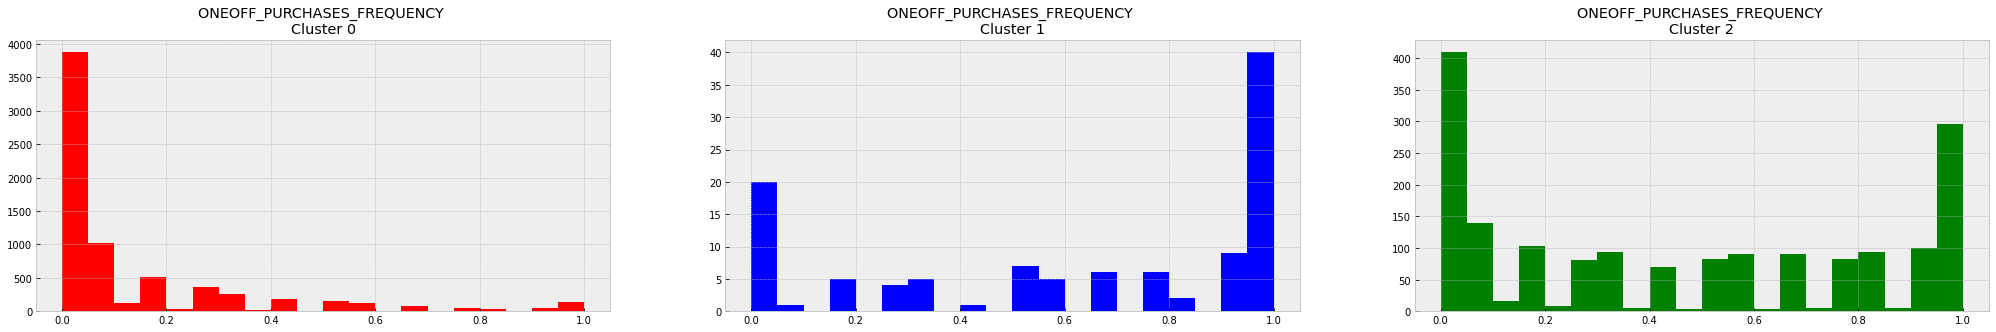

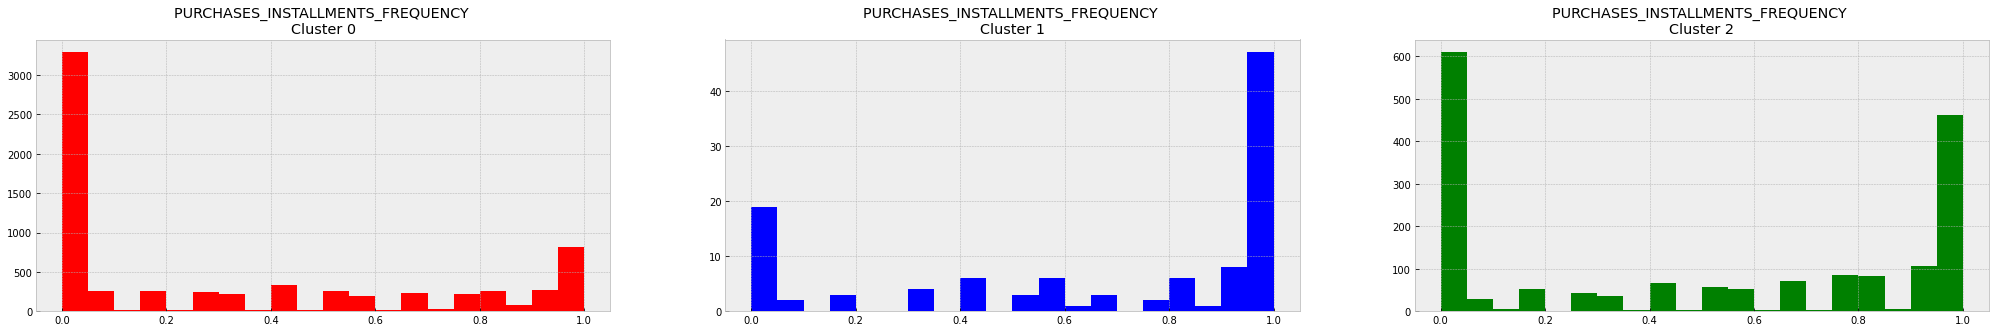

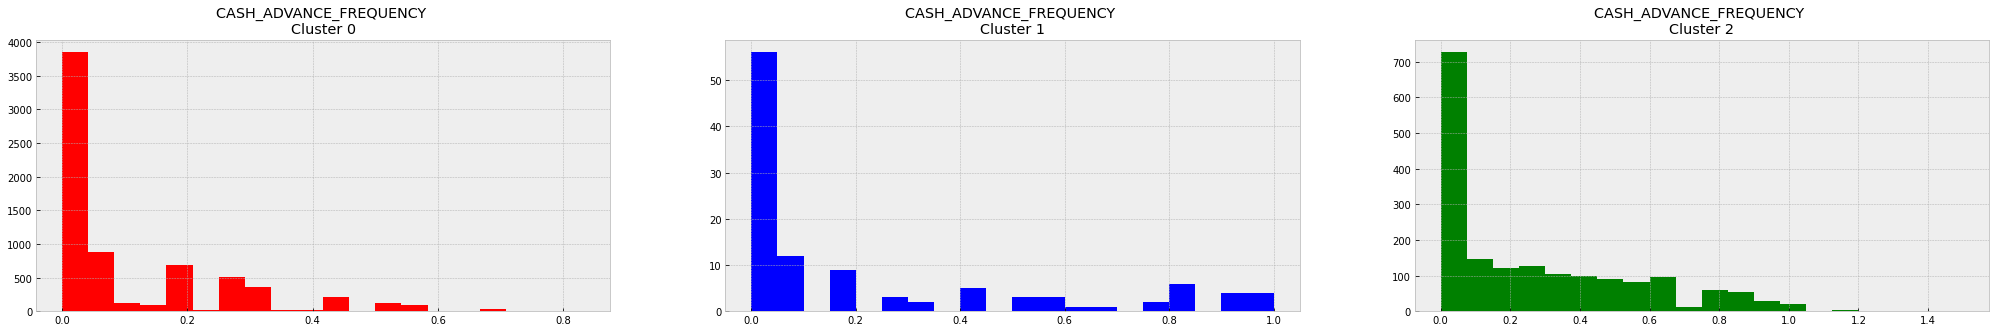

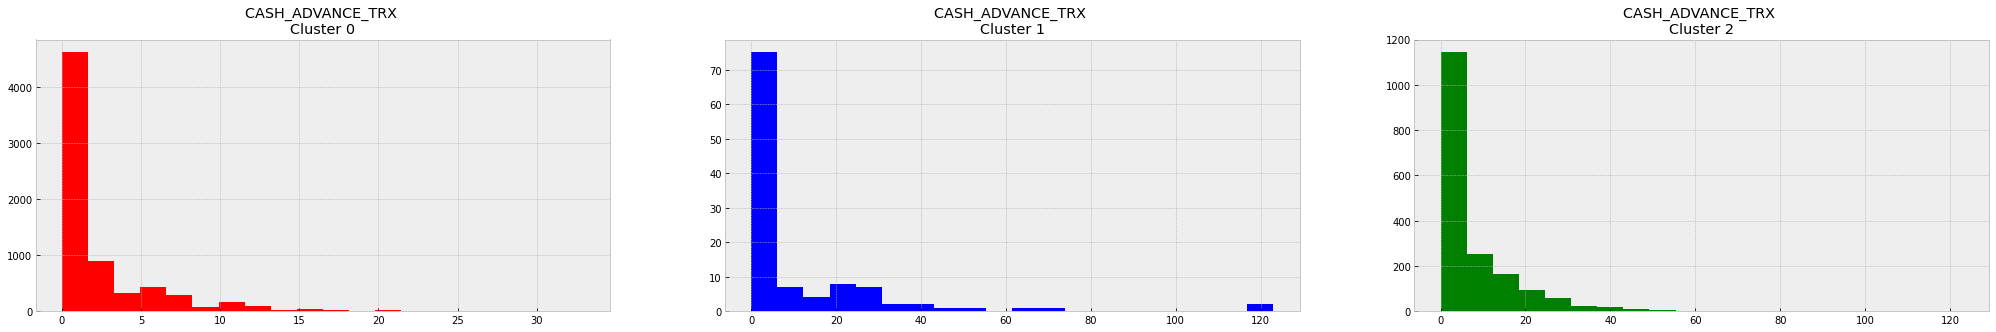

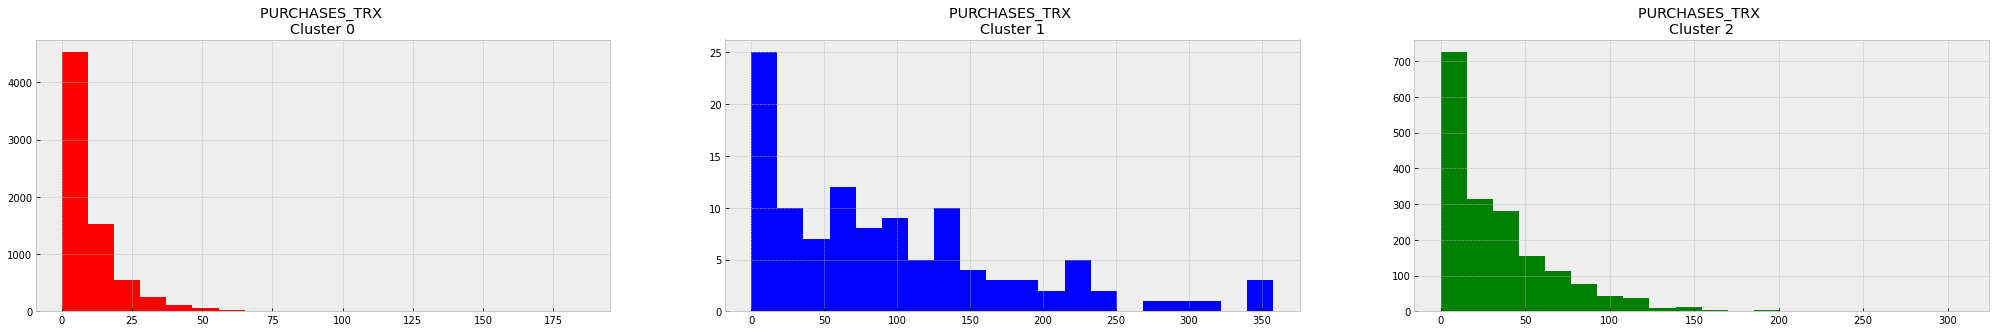

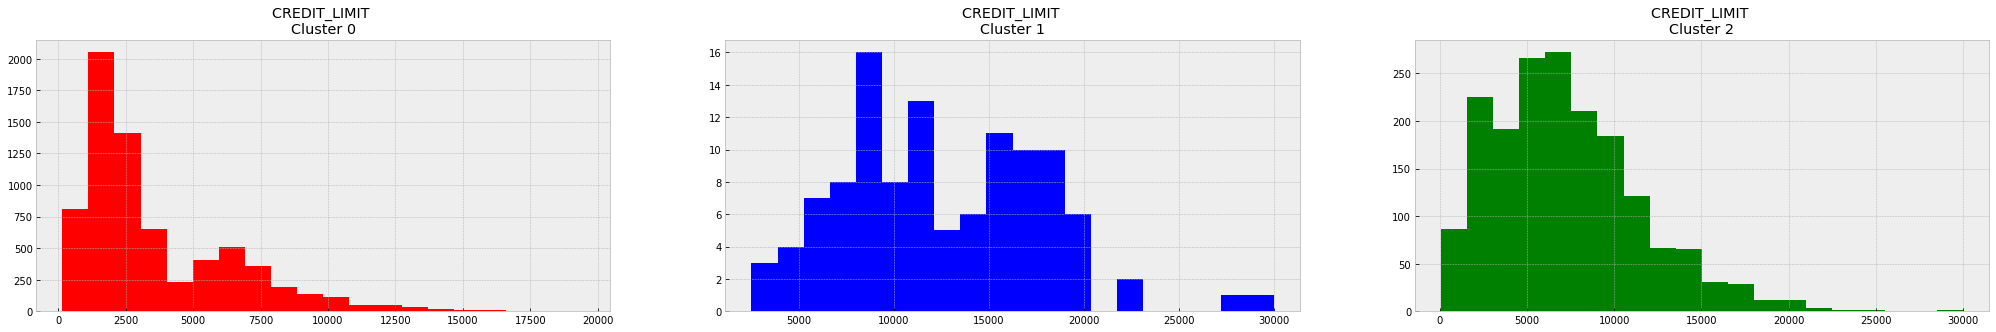

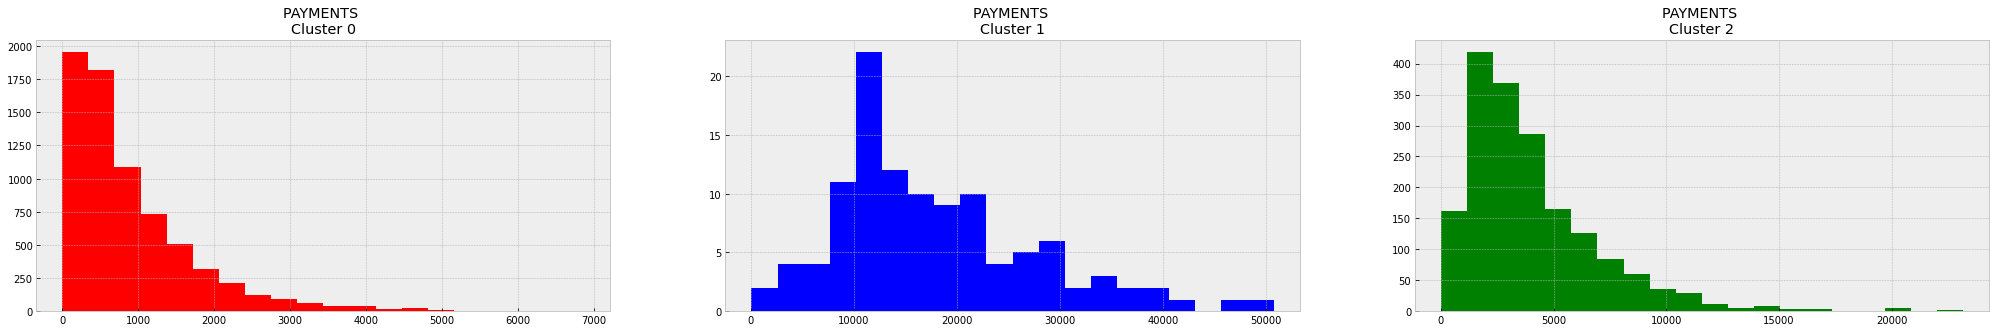

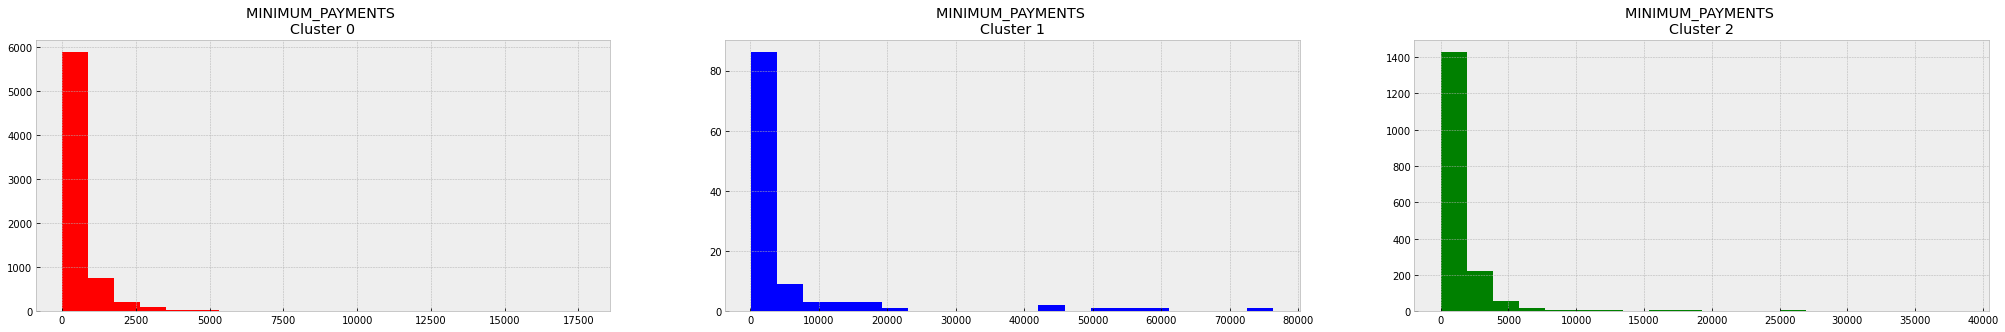

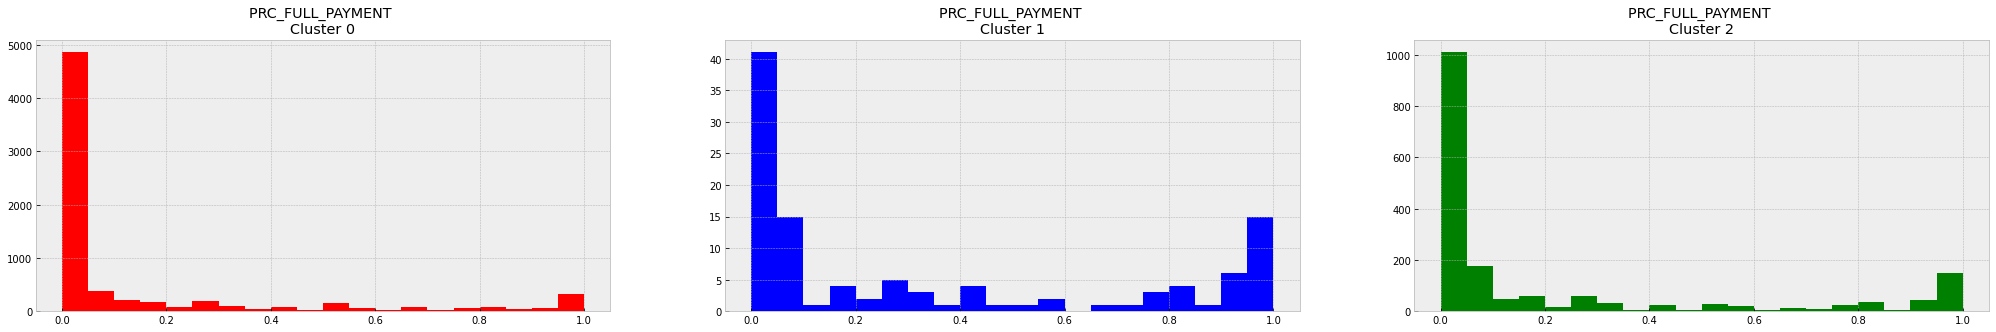

In [63]:
color = ['r', 'b', 'g']
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j,c in zip(range(3), color):
    plt.subplot(1, 3, j + 1)
    cluster = df_cluster_auto[df_cluster_auto['cluster'] == j]
    cluster[i].hist(bins = 20, color=c)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [64]:
variaveis = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PRC_FULL_PAYMENT', 'CREDIT_LIMIT', 'PAYMENTS']

In [65]:
df_cluster_0 = df_cluster_ordered.loc[df_cluster_ordered['cluster']==0]
df_cluster_1 = df_cluster_ordered.loc[df_cluster_ordered['cluster']==1]
df_cluster_2 = df_cluster_ordered.loc[df_cluster_ordered['cluster']==2]

In [66]:
df_cluster_0[variaveis].mean()

BALANCE             1148.296404
PURCHASES            489.190211
CASH_ADVANCE         601.136205
PRC_FULL_PAYMENT       0.137606
CREDIT_LIMIT        3615.851941
PAYMENTS             904.338655
dtype: float64

In [67]:
df_medias = pd.DataFrame({'Cluster_0': df_cluster_0[variaveis].mean().values, 
                          'Cluster_1': df_cluster_1[variaveis].mean().values,
                          'Cluster_2': df_cluster_2[variaveis].mean().values}, 
                         index = df_cluster_0[variaveis].mean().index)

In [68]:
df_medias

,Cluster_0,Cluster_1,Cluster_2
BALANCE,1148.296404,5239.609918,2986.779312
PURCHASES,489.190211,11855.684775,2365.946802
CASH_ADVANCE,601.136205,5066.378604,2222.881859
PRC_FULL_PAYMENT,0.137606,0.335270,0.206315
CREDIT_LIMIT,3615.851941,12481.981982,7482.803754
PAYMENTS,904.338655,17846.982323,4016.858649


# CONCLUSÕES

- Os valores apresentados, são uma média dos valores das respectivas variáveis, em cada cluster, por exemplo, os clientes do cluster 2, em média, possuem um limite de crédito de U$ 5226.35.

- Esse é o momento de deduzir conclusões mais aprofundadas. Essas deduções são subjetivas e irão depender muito do objetivo da empresa, mas vamos aqui fazer algumas análises que possam ser de grande valor:

- **Cluster 0**: Clientes com limite de crédito médio; Fazem compras com baixos valores; Não pagam em dia.

- **Cluster 1**: Clientes com limite de crédito baixo; Fazem compras com baixos valores; Não pagam em dia.

- **Cluster 2**: Clientes com limite de crédito alto; Fazem compras com grandes valores; Pagam em dia.



**Com essas deduções baseadas nos clusters, podemos pensar em estratégias como**:

- Já que os clientes do cluster 0 não pagam em dia e possuem um limite de crédito razoável, não seria interessante diminuir esse limite para que a empresa não sofra com prejuízos maiores?

- Já que os clientes do cluster 1 possuem um alto limite de crédito, porém fazem compras com pequenos valores, não seria interessante, por exemplo, fazer uma parceria com alguma empresa que fornece pontos por gastos em cartões de crédito para fazer com que esses clientes gastem mais?


- Já que os clientes do cluster 2 fazem compras com grandes valores e pagam em dia, não seria interessante aumentar o limite de crédito desses clientes para que eles possam gastar mais e gerar mais lucro para a empresa?

Enfim, essas são algumas das deduções que conseguimos fazer, mas, como sabemos, tudo isso é bem subjetivo e depende do que a empresa quer no momento e se a estratégia x, y ou z faz sentido nesse momento. Não necessariamente existe um certo ou errado nessas análises, isso depende do objetivo final.


Estudo do problema para fazer uma clusterização;

Aquisição dos dados;
Análise exploratória dos dados;
Preparação e limpeza dos dados;
Modelo base de machine learning;
Testes de hipóteses modificando diversas variáveis no modelo de machine learning;
Escolha do modelo final;
Conclusão do objetivo e definição do plano de ação.

